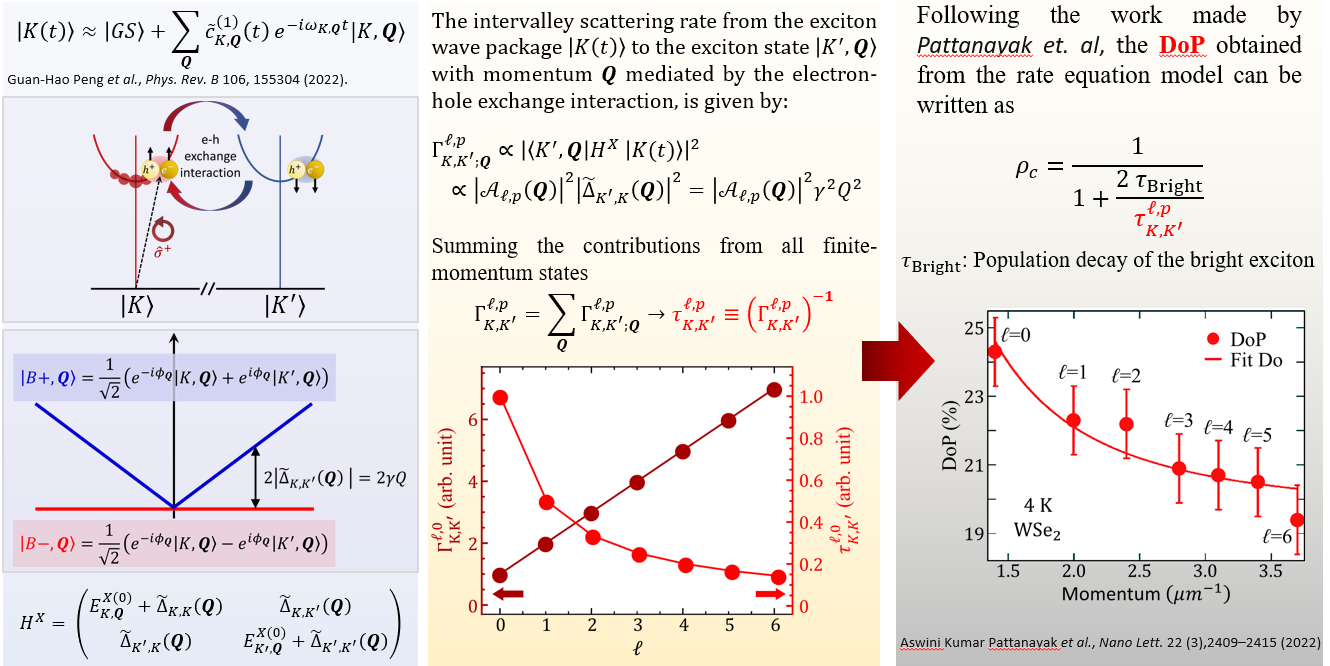

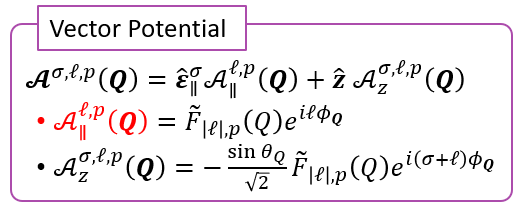

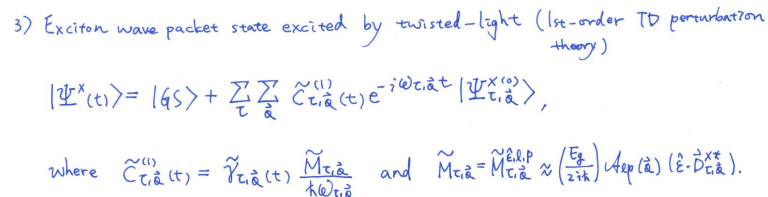

In [1]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from scipy.special import genlaguerre    #genlaguerre(n, alpha)
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker


In [2]:
#數值設定  
c = 299792458 #m/s
Eg = 1.7 #eV
D_B = 1.89 * 10**(-20) #um*C
D_G = 0.12 * 10**(-20) #um*C
a_0 = 1 #V*s
ZR = 11.81 #um
W = 1.5 #umz
Q_c = 8.6 #um^-1
q_0 = 2*ZR/(W**2) #um-1
w = c*q_0*10**(-6)
hbar = 6.582119569 * 10**(-16) #eV*s
print("q_0=",q_0,"um-1$ \nw=",w,"s^-1 \nLamda=",2*np.pi/q_0,"um")

gamma = 1.47 #eV*angstrom

q_0= 10.497777777777777 um-1$ 
w= 3147.154603537778 s^-1 
Lamda= 0.5985252726991562 um


In [3]:
def Factorial(n):
    f=1
    for i in range(1,int(n+1),1):
        f*=i 
    return f

# p=0
# def F(l,Q):
#     F = 2*np.pi/1 * a_0/W * 2**(-1-np.abs(l)/2) * np.sqrt(2*Factorial(p) / (Factorial(np.abs(l)+p))*np.pi) *np.exp(-Q**2*W**2/4) * W**2 * (Q*W)**(np.abs(l))
#     return F

# def Laguerre(rho,l,p):
#     l = np.abs(l)
#     L = 0
#     for m in range(p+1):
#         L += (-1)**m * Factorial(l+p) / (Factorial(p-m)*Factorial(l+m)*Factorial(m)) * (2*(rho/W)**2)**m
#     return L

# def f(rho,l,p):
#     l = np.abs(l)
#     f = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(l+p))) * np.exp(-(rho/W)**2) * (np.sqrt(2)*rho/W)**l * Laguerre(rho,l,p)
#     return f 

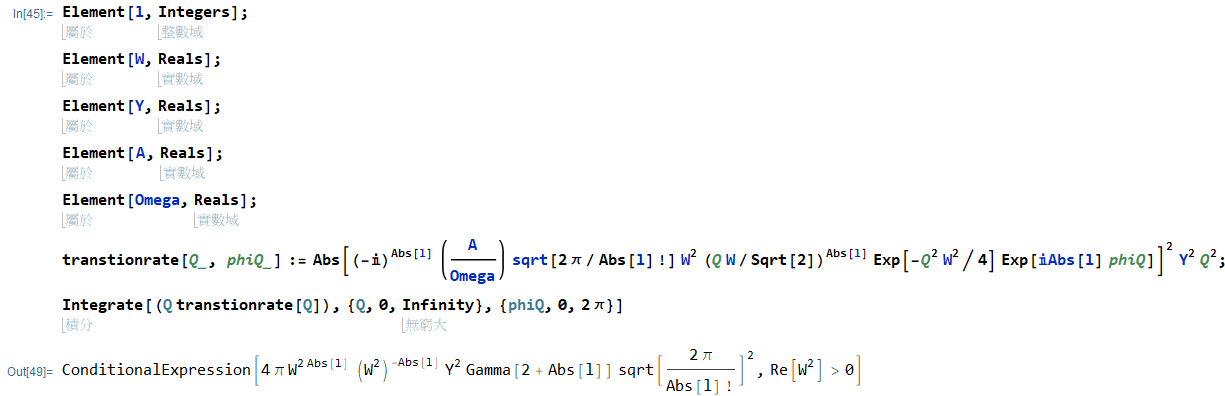

In [4]:
def tau(l):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) )
    return Tau

0
1
2
3
4
5
6


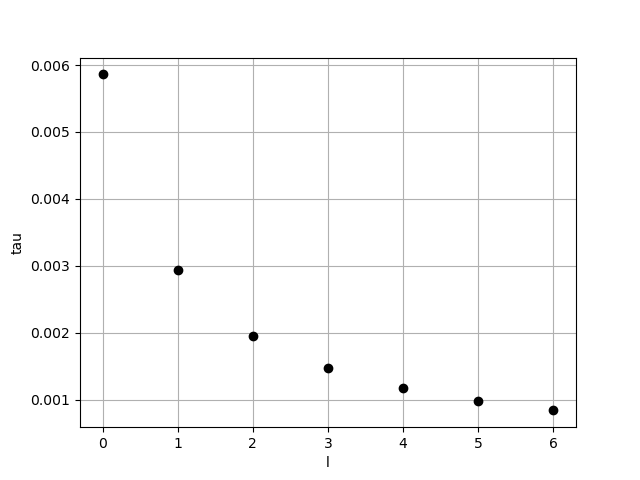

In [5]:
fig, ax = plt.subplots()

number = 0
for l in range(0,7,1):
    print(l)
    ax.plot( l, tau(l), 'o',color='black' )
    
ax.grid()
ax.set_xlabel('l')
ax.set_ylabel('tau')
plt.show()

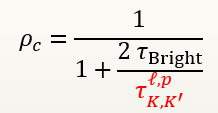

In [6]:
def DoP(l, B):
    l = np.abs(l)
    D = 1 / (1+ 2*(B/tau(l)))
    return D

In [7]:
l = 0
B = []
ratio = []
target = [0.75, 0.5, 0.25] 
for i in range(3):
    ratio += [((1/target[i])-1)/2]
    B += [  ratio[i]*tau(l)]
print(B)
print(ratio)

[0.0009768420531022738, 0.0029305261593068218, 0.008791578477920465]
[0.16666666666666663, 0.5, 1.5]


75.0
60.00000000000001
50.000000000000014
42.85714285714286
37.500000000000014
33.333333333333336
30.000000000000004
50.0
33.33333333333333
25.0
20.000000000000007
16.666666666666664
14.285714285714285
12.500000000000004
25.0
14.285714285714285
10.000000000000002
7.692307692307694
6.250000000000002
5.263157894736843
4.545454545454546


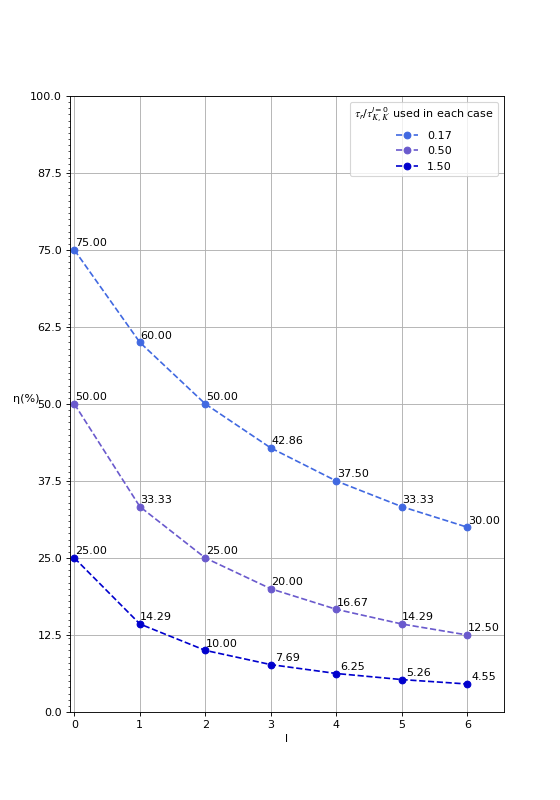

In [8]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=80)

# B = [0.00877, 0.002928, 0.000974]
Color = ['royalblue', 'slateblue', 'mediumblue']

for tauB in range(0, 3, 1):
    globals()['B'+str(tauB)] = []
    for l in range(0,7,1):
        add = 100*DoP(l, B[tauB])
        print(add)
        globals()['B'+str(tauB)] += [add]
        
for tauB in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB)], marker='o', linestyle='dashed', color=Color[tauB] , label='tauB = '+str(B[tauB]) )
    for i, v in enumerate(globals()['B'+str(tauB)]):
        ax.text(i+0.25, v+0.6, "%2.2f" %v, ha="center")
    
    
ax.grid()
ax.legend([f'{ratio[0]:3.2f}',f'{ratio[1]:3.2f}', f'{ratio[2]:3.2f}'], title="$𝜏_𝑟 / 𝜏_{𝐾,𝐾^′}^{l=0}$ used in each case")
ax.set_xlabel('l')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η(%)', rotation=0)
ax.set_yticks(np.arange(0, 101, 100/8))
ax.set_yticks(np.arange(0, 101, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

# Rate equation with trion

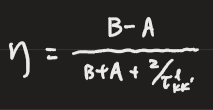

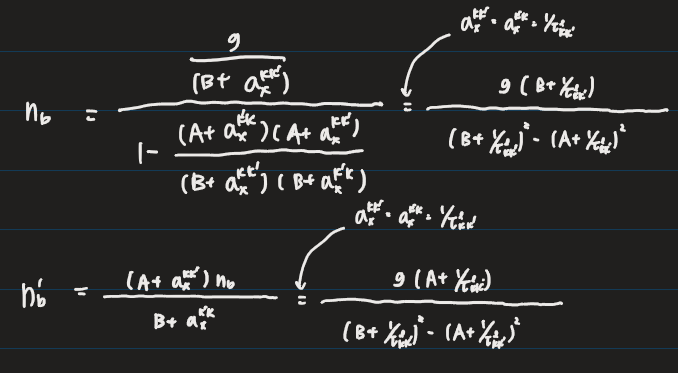

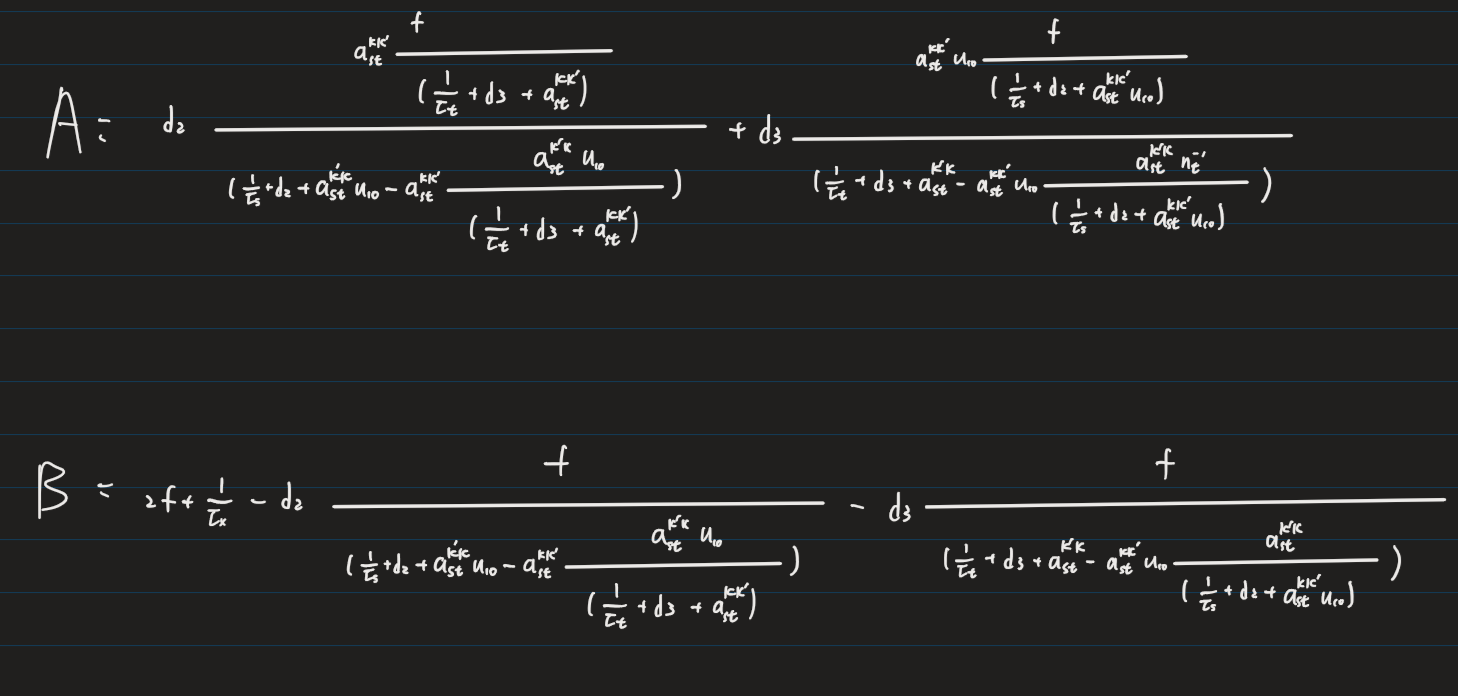

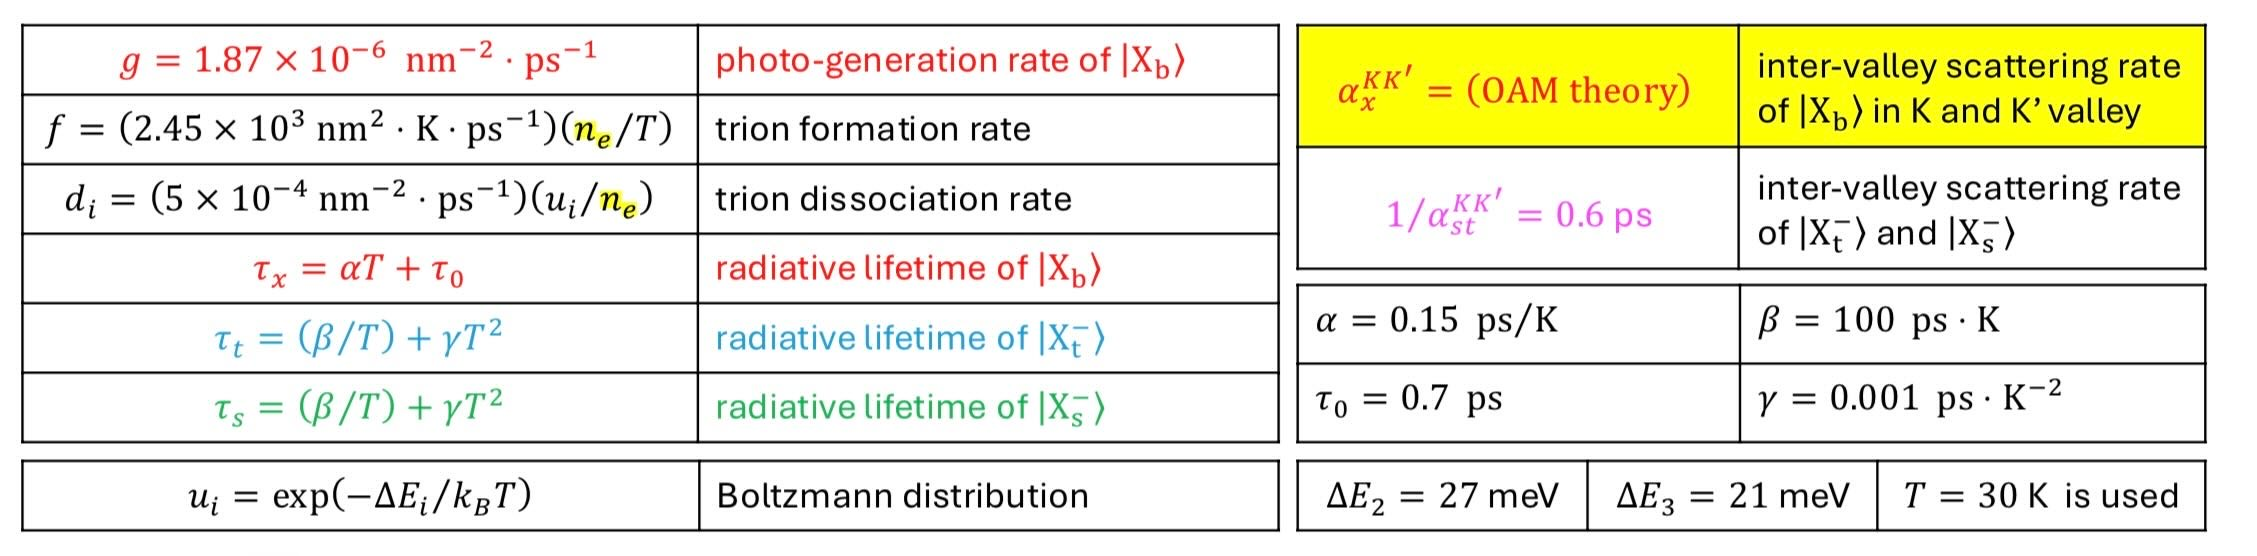

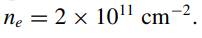

In [40]:
kB = 8.617333262145*10**(-5) #eV*K^-1
T = 30 #K
E_2 = 27*10**(-3) #eV
E_3 = 21*10**(-3) #eV
E_10 = 6*10**(-3) #eV
g = 1.87*10**(-6) #nm^-2*ps^-1
f = 2.45*10**3*(10**(-7))**2   * (2*10**11)            /T              #ps^-1
d_2 = 5*10**(-4)*(10**7)**2    * np.exp(-E_2/(kB*T))   / (2*10**11)    #ps^-1
d_3 = 5*10**(-4)*(10**7)**2    * np.exp(-E_3/(kB*T))   / (2*10**11)    #ps^-1
alpha = 0.15 #ps*K^-1
beta = 100 #ps*K
Y = 0.001 #ps*K^-2
t_0 = 0.7 #ps
t_x = alpha*T+t_0 #ps
t_t = (beta/T)+Y*T**2 #ps
t_s = (beta/T)+Y*T**2 #ps
u_10 = np.exp(-E_10/(kB*T))

ast = 1/0.6 #ps^-1 

A= d_2 * ((ast*f)/(1/t_t+d_3+ast)) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast)) + d_3 * ((ast*u_10*f)/(1/t_s+d_2+ast*u_10)) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))

B= 2*f+1/t_x- d_2 * (f) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast)) - d_3 * (f) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))

def nb(l):
    l = np.abs(l)
    nb = g*(B+1/tau(l)) / ((B+1/tau(l))**2-(A+1/tau(l))**2)
    return nb

def nbprime(l):
    l = np.abs(l)
    nbprime = g*(A+1/tau(l)) / ((B+1/tau(l))**2-(A+1/tau(l))**2)
    return nbprime

def nt(l):
    l = np.abs(l)
    nt = ( f*nb(l)+ast*u_10*f*nbprime(l)/(1/t_s+d_2+ast*u_10) ) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))
    return nt

def ntprime(l):
    l = np.abs(l)
    ntprime = ( f*nbprime(l)+ast*u_10*f*nb(l)/(1/t_s+d_2+ast*u_10) ) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))
    return ntprime

def ns(l):
    l = np.abs(l)
    ns = ( f*nb(l)+ast*f*nbprime(l)/(1/t_t+d_3+ast) ) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast))
    return ns

def nsprime(l):
    l = np.abs(l)
    nsprime = ( f*nbprime(l)+ast*f*nb(l)/(1/t_t+d_3+ast) ) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast))
    return nsprime

print("A=",A ,"\nB=",B)
print("B-A=",B-A)
print("B+A=",B+A)
print(1/ast)
print(1/(ast*u_10))

A= 8.118869792065777e-06 
B= 0.5189598044931314
B-A= 0.5189516856233394
B+A= 0.5189679233629234
0.6
6.110924069043582


In [41]:
def tau(l):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) )
    return Tau

def DoP(l, t_B):
    l = np.abs(l)
    D = 1 / (1+ 2*(t_B/tau(l)))
    return D

def DoP_with_trion(l, t_B_with_trion):
    l = np.abs(l)
    Dt = (B-A) / (B+A+2*(t_B_with_trion/tau(l)))
    return Dt

# def DoP_with_trion(l):
#     l = np.abs(l)
#     Dt = ((nb(l)+nt(l)+ns(l))-(nbprime(l)+ntprime(l)+nsprime(l)))/((nb(l)+nt(l)+ns(l))+(nbprime(l)+ntprime(l)+nsprime(l)))
#     return Dt

In [42]:
l = 0
t_B = []
ratio = []
target = [0.75, 0.5, 0.25] 
for i in range(3):
    ratio += [((1/target[i])-1)/2]
    t_B += [ratio[i]*tau(l)]
print(t_B)
print(ratio)

t_B_with_trion = []
ratio_with_trion = []
target = [0.75, 0.5, 0.25] 
for i in range(3):
    ratio_with_trion += [ (B*(1-target[i])-A*(1+target[i])) / (2*target[i]) ]
    t_B_with_trion += [ratio_with_trion[i]*tau(l)]
print(t_B_with_trion)
print(ratio_with_trion)

[0.0009768420531022738, 0.0029305261593068218, 0.008791578477920465]
[0.16666666666666663, 0.5, 1.5]
[0.0005068862449245692, 0.0015207539050149466, 0.004562356885286078]
[0.08648382873409782, 0.2594677239418776, 0.7784194095652169]


75.0
60.00000000000001
50.000000000000014
42.85714285714286
37.500000000000014
33.333333333333336
30.000000000000004
50.0
33.33333333333333
25.0
20.000000000000007
16.666666666666664
14.285714285714285
12.500000000000004
25.0
14.285714285714285
10.000000000000002
7.692307692307694
6.250000000000002
5.263157894736843
4.545454545454546


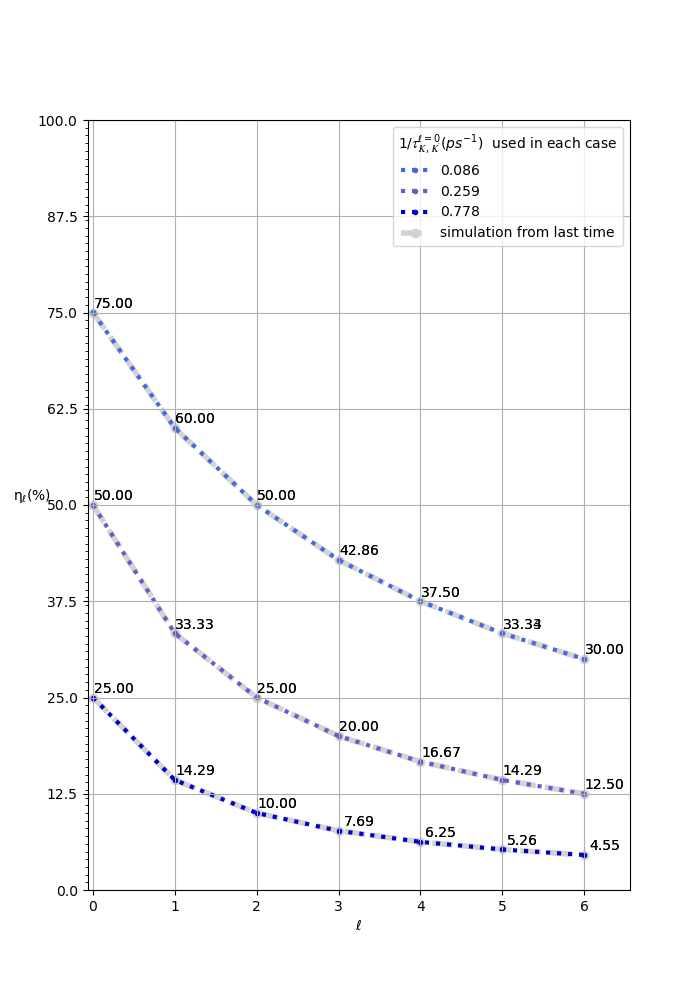

In [43]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
Color = ['royalblue', 'slateblue', 'mediumblue']
# Color = ['darkseagreen', 'darkolivegreen', 'forestgreen']

# def tau(l):
#     l = np.abs(l)
#     Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) *1774.5
#     return Tau


for tauB_with_trion in range(0, 3, 1):
    globals()['B'+str(tauB_with_trion)] = []
    for l in range(0,7,1):
        add = 100*DoP_with_trion(l, t_B_with_trion[tauB_with_trion]) 
        # print("with_trion",add)
        globals()['B'+str(tauB_with_trion)] += [add]
        
for tauB_with_trion in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB_with_trion)], marker='.', linestyle='dotted', color=Color[tauB_with_trion] , label='tauB_with_trion = '+str(t_B_with_trion[tauB_with_trion]) ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(tauB_with_trion)]):
        ax.text(i+0.25, v+0.6, "%2.2f" %v, ha="center")  


for tauB in range(0, 3, 1):
    globals()['B'+str(tauB)] = []
    for l in range(0,7,1):
        add = 100*DoP(l, t_B[tauB])
        print(add)
        globals()['B'+str(tauB)] += [add]
        
for tauB in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB)], marker='o', linestyle='dashed', color="lightgray" , label='tauB = '+str(t_B[tauB]) ,linewidth=4, zorder=0)
    for i, v in enumerate(globals()['B'+str(tauB)]):
        ax.text(i+0.25, v+0.6, "%2.2f" %v, ha="center")

      
        
        
        
        
ax.grid()
ax.legend([f'{ratio_with_trion[0]:4.3f}',f'{ratio_with_trion[1]:4.3f}', f'{ratio_with_trion[2]:4.3f}', 'simulation from last time'], title="$1 / 𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
ax.set_yticks(np.arange(0, 101, 100/8))
ax.set_yticks(np.arange(0, 101, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

In [13]:
for l in range(7):
    print("when l =",l,"total = ",nb(l)+nbprime(l)+nt(l)+ntprime(l)+ns(l)+nsprime(l))
    print("    nb = ",nb(l))
    print("    nbprime = ",nbprime(l))
    print("    nt = ",nt(l))
    print("    ntprime = ",ntprime(l))
    print("    ns = ",ns(l))
    print("    nsprime = ",nsprime(l))
    print("            Thus Dop = ",(nb(l)-nbprime(l))/(nb(l)+nbprime(l))*100,"%")
    print("            Thus Dop = ",((nb(l)+nt(l)+ns(l))-(nbprime(l)+ntprime(l)+nsprime(l)))/((nb(l)+nt(l)+ns(l))+(nbprime(l)+ntprime(l)+nsprime(l)))*100,"%")
    print("       ")

when l = 0 total =  8.586199555485921e-06
    nb =  1.8044450303346224e-06
    nbprime =  1.7989732681411905e-06
    nt =  3.3989145895769923e-07
    ntprime =  3.394590095348785e-07
    ns =  2.151931680175222e-06
    nsprime =  2.15149910834231e-06
            Thus Dop =  0.15184920928403858 %
            Thus Dop =  0.07380195869215676 %
       
when l = 1 total =  8.586199555486013e-06
    nb =  1.803078129211438e-06
    nbprime =  1.8003401692644126e-06
    nt =  3.397834287508177e-07
    ntprime =  3.395670397417671e-07
    ns =  2.1518236193890898e-06
    nsprime =  2.151607169128487e-06
            Thus Dop =  0.07598229570470408 %
            Thus Dop =  0.0369290184346181 %
       
when l = 2 total =  8.586199555485631e-06
    nb =  1.8026220337709631e-06
    nbprime =  1.8007962647047274e-06
    nt =  3.3974738218975384e-07
    ntprime =  3.396030863028008e-07
    ns =  2.1517875626245257e-06
    nsprime =  2.15164322589286e-06
            Thus Dop =  0.0506676970311246 %
  

# Combine singlet and triplet trion state

In [10]:
kB = 8.617333262145*10**(-5) #eV*K^-1
T =  30 #K
E_2 = 27*10**(-3) #eV
E_3 = 21*10**(-3) #eV
GK = 1.87*10**(-6) * 20*10**(-6) #nm^-2*ps^-2 *nm^2
f = 2.45*10**3   *(10**(-7))**2   * (2*10**11)          / T            #ps^-1
print('f = ',f,' ps^-1')
d_2 = 5*10**(-4) *(10**7)**2    * np.exp(-E_2/(kB*T))   / (2*10**11)   #ps^-1
print('d_2 = ',d_2,' ps^-1')
d_3 = 5*10**(-4) *(10**7)**2    * np.exp(-E_3/(kB*T))   / (2*10**11)   #ps^-1
print('d_3 = ',d_3,' ps^-1')
# d = (d_2+d_3)/2                                                        #ps^-1
d = 0 
print('d = ',d,' ps^-1')
alpha = 0.15 #ps*K^-1
beta = 100 #ps*K
Y = 0.001 #ps*K^-2
t_0 = 0.7 #ps
t_r = alpha*T+t_0      #ps
print('t_r = ',t_r,' ps')
t_t = (beta/T)+Y*T**2  #ps
print('t_t = ',t_t,' ps')
taut = 0.6 #ps 

A= (1/taut)*d*f / ((1/t_t+d+1/taut)**2-(1/taut)**2) 

B= 1/t_r+f - (1/t_t+d+1/taut)*d*f / ((1/t_t+d+1/taut)**2-(1/taut)**2) 

def NK(l):
    l = np.abs(l)
    NK = GK*(B+1/tau(l)) / ((B+1/tau(l))**2-(A+1/tau(l))**2)
    return NK

def NKprime(l):
    l = np.abs(l)
    NKprime = GK*(A+1/tau(l)) / ((B+1/tau(l))**2-(A+1/tau(l))**2)
    return NKprime

def C(l):
    C = GK*f*(1/t_r+f+1/tau(l)) / ((1/t_r+f+1/tau(l))**2-(1/tau(l))**2)
    return C
def D(l):
    C = 1/t_t+d - d*f*(1/t_r+f+1/tau(l))/((1/t_r+f+1/tau(l))**2-(1/tau(l))**2) +1/taut
    return C
def E(l):
    E = (d*f/tau(l)) / ((1/t_r+f+1/tau(l))**2-(1/tau(l))**2) +1/taut
    return C
def F(l):
    F = (GK*f/tau(l)) / ((1/t_r+f+1/tau(l))**2-(1/tau(l))**2)
    return F

def nK(l):
    l = np.abs(l)
    nK = (C(l)*D(l)+E(l)*F(l))/(D(l)**2-E(l)**2)
    return nK

def nKprime(l):
    l = np.abs(l)
    nKprime = (F(l)*D(l)+E(l)*C(l))/(D(l)**2-E(l)**2)
    return nKprime


print("A=",A,"\nB=",B)
print("B-A=",B-A)
print("B+A=",B+A)

f =  0.1633333333333333  ps^-1
d_2 =  7.2801385050683795e-06  ps^-1
d_3 =  7.414728936098874e-05  ps^-1
d =  0  ps^-1
t_r =  5.2  ps
t_t =  4.233333333333333  ps
A= 0.0 
B= 0.3556410256410256
B-A= 0.3556410256410256
B+A= 0.3556410256410256


In [45]:
def tau(l):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) 
    return Tau

def DoP(l, t_B):
    l = np.abs(l)
    D = 1 / (1+ 2*(t_B/tau(l)))
    return D

def DoP_with_trion(l, t_B_with_trion):
    l = np.abs(l)
    Dt = (B-A) / (B+A+2*(t_B_with_trion/tau(l)))
    return Dt

# def DoP_with_trion(l):
#     l = np.abs(l)
#     Dt = ((NK(l)+nK(l))-(NKprime(l)+nKprime(l)))/((NK(l)+nK(l))+(NKprime(l)+nKprime(l)))
#     return Dt

In [46]:
l = 0
t_B = []
ratio = []
target = [0.75, 0.5, 0.25] 
for i in range(3):
    ratio += [((1/target[i])-1)/2]
    t_B += [ratio[i]*tau(l)]
print(t_B)
print(ratio)

t_B_with_trion = []
ratio_with_trion = []
target = [0.75, 0.5, 0.25] 
for i in range(3):
    ratio_with_trion += [ (B*(1-target[i])-A*(1+target[i])) / (2*target[i]) ]
    t_B_with_trion += [ratio_with_trion[i]*tau(l)]
print(t_B_with_trion)
print(ratio_with_trion)

[0.0009768420531022738, 0.0029305261593068218, 0.008791578477920465]
[0.16666666666666663, 0.5, 1.5]
[0.0003474051096545779, 0.0010422153289637338, 0.003126645986891201]
[0.05927350427350427, 0.1778205128205128, 0.5334615384615384]


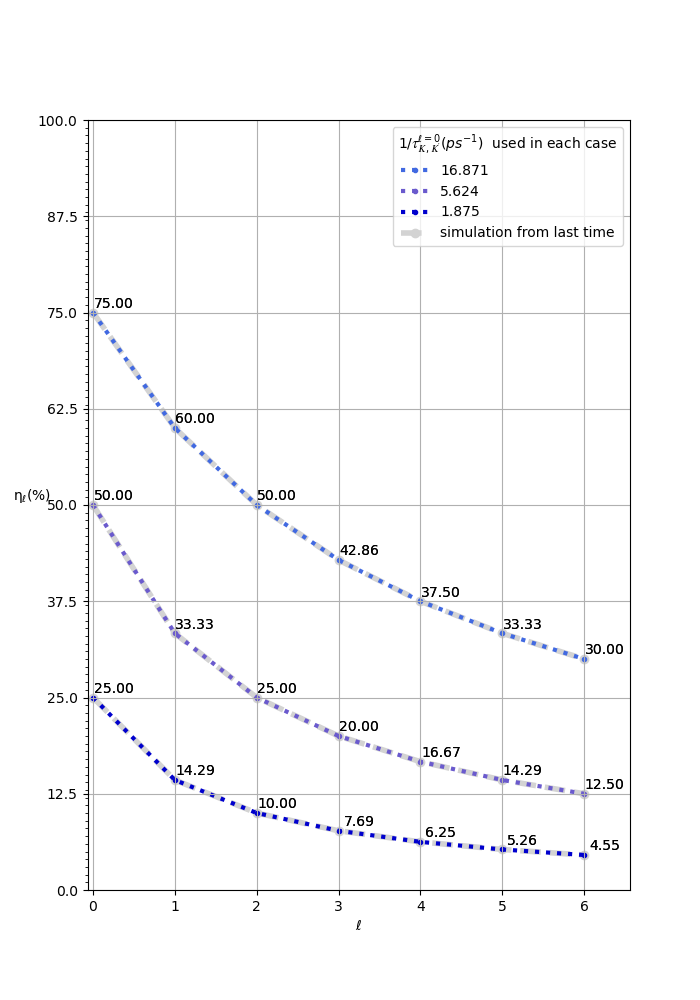

In [47]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
Color = ['royalblue', 'slateblue', 'mediumblue']
# Color = ['darkseagreen', 'darkolivegreen', 'forestgreen']

# def tau(l):
#     l = np.abs(l)
#     Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) 
#     return Tau


for tauB_with_trion in range(0, 3, 1):
    globals()['B'+str(tauB_with_trion)] = []
    for l in range(0,7,1):
        add = 100*DoP_with_trion(l, t_B_with_trion[tauB_with_trion]) 
        # print("with_trion",add)
        globals()['B'+str(tauB_with_trion)] += [add]
        
for tauB_with_trion in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB_with_trion)], marker='.', linestyle='dotted', color=Color[tauB_with_trion] , label='tauB_with_trion = '+str(t_B_with_trion[tauB_with_trion]) ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(tauB_with_trion)]):
        ax.text(i+0.25, v+0.6, "%2.2f" %v, ha="center")  


for tauB in range(0, 3, 1):
    globals()['B'+str(tauB)] = []
    for l in range(0,7,1):
        add = 100*DoP(l, t_B[tauB])
        # print(add)
        globals()['B'+str(tauB)] += [add]
        
for tauB in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB)], marker='o', linestyle='dashed', color="lightgray" , label='tauB = '+str(t_B[tauB]) ,linewidth=4, zorder=0)
    for i, v in enumerate(globals()['B'+str(tauB)]):
        ax.text(i+0.25, v+0.6, "%2.2f" %v, ha="center")

      
        
        
        
        
ax.grid()
ax.legend([f'{1/ratio_with_trion[0]:4.3f}',f'{1/ratio_with_trion[1]:4.3f}', f'{1/ratio_with_trion[2]:4.3f}', 'simulation from last time'], title="1/$𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
ax.set_yticks(np.arange(0, 101, 100/8))
ax.set_yticks(np.arange(0, 101, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

# If consider trion light

In [48]:
def tau_for_exciton(l):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * 1
    return Tau

def tau(l, muti):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * muti
    return Tau

In [57]:
kB = 8.617333262145*10**(-5) #eV*K^-1
T = 30 #K
E_2 = 27*10**(-3) #eV
E_3 = 21*10**(-3) #eV
GK = 1.87*10**(-6) * 20*10**(6) #nm^-2*ps^-2 *nm^2
f = 2.45*10**3   *(10**(-7))**2 * (2*10**11)            / T           #ps^-1
print('f = ',f,' ps^-1')
# d_2 = 5*10**(-4) *(10**7)**2    * np.exp(-E_2/(kB*T))   / (2*10**11)    #ps^-1
# print('d_2 = ',d_2,' ps^-1')
# d_3 = 5*10**(-4) *(10**7)**2    * np.exp(-E_3/(kB*T))   / (2*10**11)    #ps^-1
# print('d_3 = ',d_3,' ps^-1')
# d = (d_2+d_3)/2                                                  #ps^-1
d = 0
print('d = ',d,' ps^-1')
alpha = 0.15 #ps*K^-1
beta = 100 #ps*K
Y = 0.001 #ps*K^-2
t_0 = 0.7 #ps
t_r = alpha*T+t_0      #ps
print('t_r = ',t_r,' ps')
print('1/t_r = ',1/t_r,' ps')
t_t = (beta/T)+Y*T**2  #ps
print('t_t = ',t_t,' ps')
print('1/t_t = ',1/t_t,' ps')
taut = 0.6 #ps 


A= (1/taut)*d*f / ((1/t_t+d+1/taut)**2-(1/taut)**2) 

B= 1/t_r+f - (1/t_t+d+1/taut)*d*f / ((1/t_t+d+1/taut)**2-(1/taut)**2) 

def NK(l, muti):
    l = np.abs(l)
    NK = GK*(B+1/tau(l, muti)) / ((B+1/tau(l, muti))**2-(A+1/tau(l, muti))**2)
    return NK

def NKprime(l, muti):
    l = np.abs(l)
    NKprime = GK*(A+1/tau(l, muti)) / ((B+1/tau(l, muti))**2-(A+1/tau(l, muti))**2)
    return NKprime

def C(l, muti):
    C = GK*f*(1/t_r+f+1/tau(l, muti)) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2)
    return C
def D(l, muti):
    D = 1/t_t+d - d*f*(1/t_r+f+1/tau(l, muti))/((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2) +1/taut
    return D
def E(l, muti):
    E = (d*f/tau(l, muti)) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2) +1/taut
    return E
def F(l, muti):
    F = (GK*f/tau(l, muti)) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2)
    return F

nK = 0
def nK(l, muti):
    l = np.abs(l)
    nK = ((C(l, muti)*D(l, muti))+(E(l, muti)*F(l, muti)))/(D(l, muti)**2-E(l, muti)**2)
    return nK

nKprime = 0
def nKprime(l, muti):
    l = np.abs(l)
    nKprime = ((F(l, muti)*D(l, muti))+(E(l, muti)*C(l, muti)))/(D(l, muti)**2-E(l, muti)**2)
    return nKprime


print("A=",A,"\nB=",B)
print("B-A=",B-A)
print("B+A=",B+A)

f =  0.1633333333333333  ps^-1
d =  0  ps^-1
t_r =  5.2  ps
1/t_r =  0.1923076923076923  ps
t_t =  4.233333333333333  ps
1/t_t =  0.23622047244094488  ps
A= 0.0 
B= 0.3556410256410256
B-A= 0.3556410256410256
B+A= 0.3556410256410256


In [58]:
def DoP(l, t_B):
    l = np.abs(l)
    DoP = 1 / (1+ 2*(t_B/tau_for_exciton(l)))
    return DoP

def DoP_with_trion(l, multiplier):
    l = np.abs(l)
    muti = multiplier
    Dt = ((NK(l, muti)+nK(l, muti))-(NKprime(l, muti)+nKprime(l, muti)))/((NK(l, muti)+nK(l, muti))+(NKprime(l, muti)+nKprime(l, muti)))
    return Dt

# def DoP_with_trion(l, multiplier):
#     l = np.abs(l)
#     muti = multiplier
#     Dt = (NK(l, muti)-NKprime(l, muti))/(NK(l, muti)+NKprime(l, muti))
#     return Dt


In [59]:
l = 0
t_B = []
ratio = []
target = [0.75, 0.5, 0.25] 
for i in range(3):
    ratio += [((1/target[i])-1)/2]
    t_B += [ratio[i]*tau_for_exciton(l)]
print(t_B)
print(ratio)

# t_B_with_trion = []
# ratio_with_trion = []
# target = [0.75, 0.5, 0.25] 
# for i in range(3):
#     ratio_with_trion += [ (B*(1-target[i])-A*(1+target[i])) / (2*target[i]) ]
#     t_B_with_trion += [ratio_with_trion[i]*tau(l)]
# print(t_B_with_trion)
# print(ratio_with_trion)


muti = [np.power(10,7), 1.25*np.power(10,4), 4055, 651.5]
# muti = [np.power(10,4)*6]

[0.0009768420531022738, 0.0029305261593068218, 0.008791578477920465]
[0.16666666666666663, 0.5, 1.5]


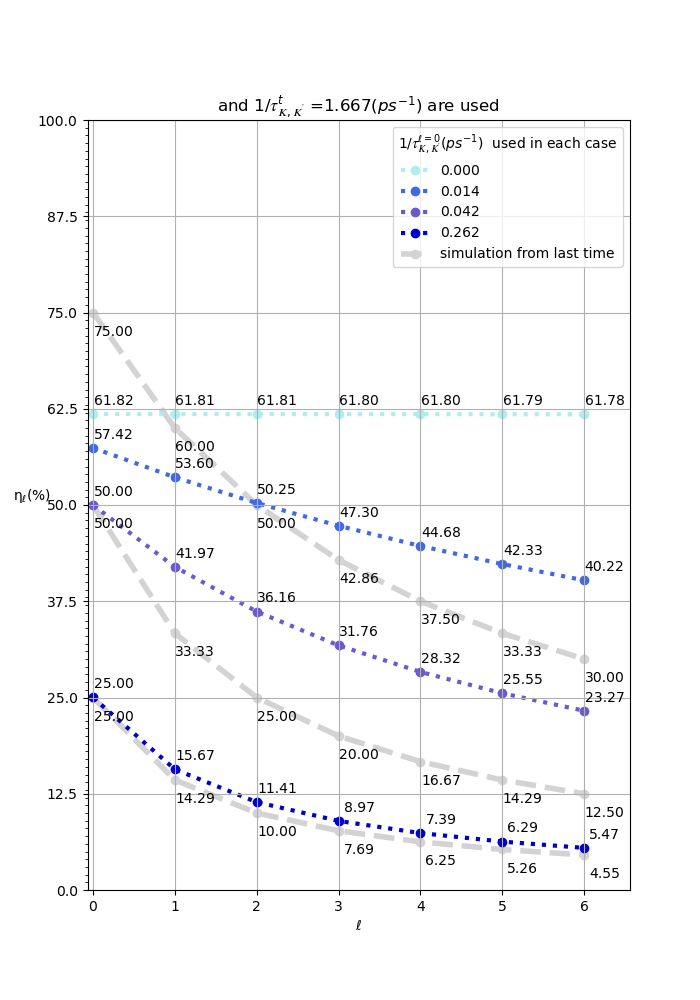

In [60]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
Color = ['paleturquoise', 'royalblue', 'slateblue', 'mediumblue']
# Color = ['darkseagreen', 'darkolivegreen', 'forestgreen']
# Color = ['orangered']

for tauB_with_trion in range(0, 4, 1):
    globals()['B'+str(tauB_with_trion)] = []
    for l in range(0,7,1):
        add = 100*DoP_with_trion(l, muti[tauB_with_trion]) 
        # print("with_trion",add)
        globals()['B'+str(tauB_with_trion)] += [add]
        
for tauB_with_trion in range(0, 4, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB_with_trion)], marker='o', linestyle='dotted', color=Color[tauB_with_trion] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(tauB_with_trion)]):
        ax.text(i+0.25, v+1.2, "%2.2f" %v, ha="center")  


for tauB in range(0, 3, 1):
    globals()['B'+str(tauB)] = []
    for l in range(0,7,1):
        add = 100*DoP(l, t_B[tauB])
        # print(add)
        globals()['B'+str(tauB)] += [add]
        
for tauB in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB)], marker='o', linestyle='dashed', color="lightgray" , label='tauB = '+str(t_B[tauB]) ,linewidth=4, zorder=0)
    for i, v in enumerate(globals()['B'+str(tauB)]):
        ax.text(i+0.25, v-3, "%2.2f" %v, ha="center")

      
        
        
        
        
ax.grid()
ax.legend([f'{1/(muti[0]*tau_for_exciton(0)):4.3f}',f'{1/(muti[1]*tau_for_exciton(0)):4.3f}', f'{1/(muti[2]*tau_for_exciton(0)):4.3f}', f'{1/(muti[3]*tau_for_exciton(0)):4.3f}', 'simulation from last time'], title="1/$𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
# ax.legend([f'{1/(muti[0]*tau_for_exciton(0)):4.3f}', 'simulation from last time'], title="1/$𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$ are used ")
ax.set_title("and 1/$𝜏_{𝐾,𝐾^′}^{t}$ ="+f'{1/taut:4.3f}'+"$(ps^{-1})$ are used ")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
ax.set_yticks(np.arange(0, 101, 100/8))
ax.set_yticks(np.arange(0, 101, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

In [27]:
for i in range(0, 4, 1):
    print(i)

0
1
2
3


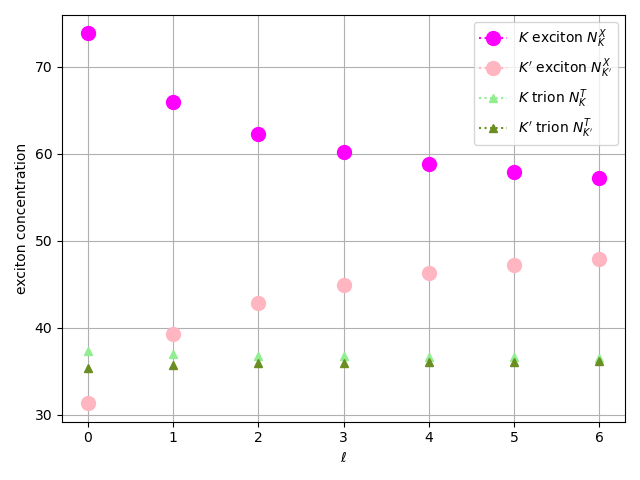

In [29]:
# Create some mock data
# muti = [np.power(10,7), 1.25*np.power(10,4), 4055, 651.5]
# muti = np.power(10,7)
# muti = 1.25*np.power(10,4)
# muti = 4055
muti = 651.5

fig, ax1 = plt.subplots(dpi=100)

color = 'tab:red'
ax1.set_xlabel('$\ell$')
ax1.set_ylabel('exciton concentration')
for l in np.arange(0, 7, 1):
    ax1.plot(l, NK(l, muti), marker='o', markersize=10, linestyle='dotted', color="magenta", label="$N^{X}_{K}$")
    ax1.plot(l, NKprime(l, muti), marker='o', markersize=10, linestyle='dotted', color="lightpink", label="$N^{X}_{K'}$")
    ax1.plot(l, nK(l, muti), marker='^', linestyle='dotted', color="lightgreen", label="$N^{T}_{K}$")
    ax1.plot(l, nKprime(l, muti), marker='^', linestyle='dotted', color="olivedrab", label="$N^{T}_{K'}$")
ax1.tick_params(axis='y')

# ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('trion concentration')  # we already handled the x-label with ax1
# for l in np.arange(0, 7, 1):
#     ax2.plot(l, nK(l, muti), marker='^', linestyle='dotted', color="lightgreen", label="$N^{T}_{K}$")
#     ax2.plot(l, nKprime(l, muti), marker='^', linestyle='dotted', color="olivedrab", label="$N^{T}_{K'}$")
# ax2.tick_params(axis='y')

# ax1.legend(["$K$ exciton $N^{X}_{K}$", "$K'$ exciton $N^{X}_{K'}$"])
# ax2.legend(["$K$ trion $N^{T}_{K}$", "$K'$ trion $N^{T}_{K'}$"], loc='lower right')
ax1.legend(["$K$ exciton $N^{X}_{K}$", "$K'$ exciton $N^{X}_{K'}$", "$K$ trion $N^{T}_{K}$", "$K'$ trion $N^{T}_{K'}$"], loc='upper right')
ax1.grid()
# ax1.set_ylim(-0.05*np.power(0.1, 10), 1.1*np.power(0.1, 10))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Trion only Dop

In [30]:
kB = 8.617333262145*10**(-5) #eV*K^-1
T = 100 #K
E_2 = 27*10**(-3) #eV
E_3 = 21*10**(-3) #eV
GK = 1.87*10**(-6) * 20*10**(-6) #nm^-2*ps^-2 *nm^2
f = 2.45*10**3*(10**(-7))**2   * (2*10**11)              / T           #ps^-1
print('f = ',f,' ps^-1')
d_2 = 5*10**(-4)*(10**7)**2    * np.exp(-E_2/(kB*T))   / (2*10**11)    #ps^-1
d_3 = 5*10**(-4)*(10**7)**2    * np.exp(-E_3/(kB*T))   / (2*10**11)    #ps^-1
d = (d_2+d_3)/2                                                      #ps^-1
print('d = ',d,' ps^-1')
alpha = 0.15 #ps*K^-1
beta = 100 #ps*K
Y = 0.001 #ps*K^-2
t_0 = 0.7 #ps
t_r = alpha*T+t_0      #ps
print('t_r = ',t_r,' ps')
t_t = (beta/T)+Y*T**2  #ps
print('t_t = ',t_t,' ps')
taut = 0.6 #ps 


A= (1/taut)*d*f / ((1/t_t+d+1/taut)**2-(1/taut)**2) 

B= 1/t_r+f - (1/t_t+d+1/taut)*d*f / ((1/t_t+d+1/taut)**2-(1/taut)**2) 

def NK(l, muti):
    l = np.abs(l)
    NK = GK*(B+1/tau(l, muti)) / ((B+1/tau(l, muti))**2-(A+1/tau(l, muti))**2)
    return NK

def NKprime(l, muti):
    l = np.abs(l)
    NKprime = GK*(A+1/tau(l, muti)) / ((B+1/tau(l, muti))**2-(A+1/tau(l, muti))**2)
    return NKprime

def C(l, muti):
    C = GK*f*(1/t_r+f+1/tau(l, muti)) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2)
    return C
def D(l, muti):
    D = 1/t_t+d - d*f*(1/t_r+f+1/tau(l, muti))/((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2) +1/taut
    return D
def E(l, muti):
    E = (d*f/tau(l, muti)) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2) +1/taut
    return E
def F(l, muti):
    F = (GK*f/tau(l, muti)) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2)
    return F

nK = 0
def nK(l, muti):
    l = np.abs(l)
    nK = ((C(l, muti)*D(l, muti))+(E(l, muti)*F(l, muti)))/(D(l, muti)**2-E(l, muti)**2)
    return nK

nKprime = 0
def nKprime(l, muti):
    l = np.abs(l)
    nKprime = ((F(l, muti)*D(l, muti))+(E(l, muti)*C(l, muti)))/(D(l, muti)**2-E(l, muti)**2)
    return nKprime


print("A=",A,"\nB=",B)
print("B-A=",B-A)
print("B+A=",B+A)

f =  0.048999999999999995  ps^-1
d =  0.016375557415353893  ps^-1
t_r =  15.7  ps
t_t =  11.0  ps
A= 0.0036229879119567543 
B= 0.10883806501355602
B-A= 0.10521507710159926
B+A= 0.11246105292551277


In [31]:
def DoP(l, t_B):
    l = np.abs(l)
    DoP = 1 / (1+ 2*(t_B/tau_for_exciton(l)))
    return DoP

# def DoP_with_trion(l, multiplier):
#     l = np.abs(l)
#     muti = multiplier
#     Dt = ((NK(l, muti)+nK(l, muti))-(NKprime(l, muti)+nKprime(l, muti)))/((NK(l, muti)+nK(l, muti))+(NKprime(l, muti)+nKprime(l, muti)))
#     return Dt

def DoP_only_trion(l, multiplier):
    l = np.abs(l)
    muti = multiplier
    Dt = (nK(l, muti)-nKprime(l, muti)) / (nK(l, muti)+nKprime(l, muti))
    return Dt

In [32]:
muti = [np.power(10,7), 1.25*np.power(10,4), 4055, 651.5]

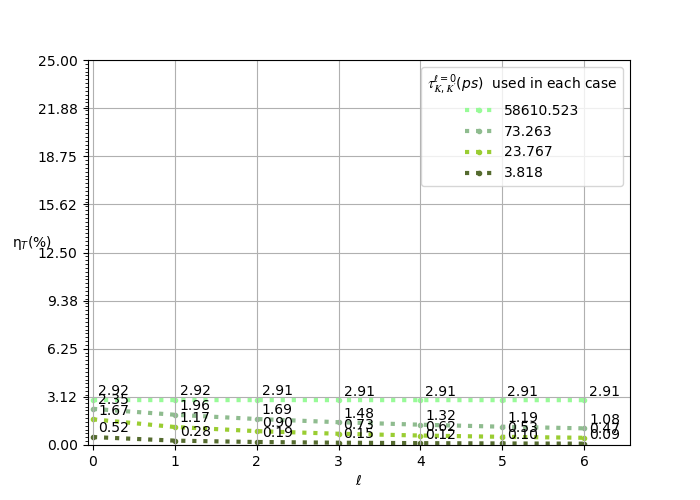

In [33]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['palegreen', 'darkseagreen', 'yellowgreen', 'darkolivegreen']

for tauB_with_trion in range(0, 4, 1):
    globals()['B'+str(tauB_with_trion)] = []
    for l in range(0,7,1):
        add = 100*DoP_only_trion(l, muti[tauB_with_trion]) 
        # print("with_trion",add)
        globals()['B'+str(tauB_with_trion)] += [add]
        
for tauB_with_trion in range(0, 4, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB_with_trion)], marker='.', linestyle='dotted', color=Color[tauB_with_trion] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(tauB_with_trion)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{(muti[0]*tau_for_exciton(0)):4.3f}',f'{(muti[1]*tau_for_exciton(0)):4.3f}', f'{(muti[2]*tau_for_exciton(0)):4.3f}', f'{(muti[3]*tau_for_exciton(0)):4.3f}'], title="$𝜏_{𝐾,𝐾^′}^{\ell=0} (ps)$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{T}$(%)', rotation=0)
ax.set_yticks(np.arange(0, 26, 25/8))
ax.set_yticks(np.arange(0, 26, 25/100), minor=True)
ax.set_ylim(0, 25)
plt.show()

# No, go back to s + t

In [141]:
def tau_for_exciton(l):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * 1
    return Tau

def tau(l, muti):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * muti
    return Tau

In [142]:
kB = 8.617333262145*10**(-5) #eV*K^-1
T = 30 #K
E_2 = 27*10**(-3) #eV
E_3 = 21*10**(-3) #eV
E_10 = 6*10**(-3) #eV
g = 1.87*10**(-6) #nm^-2*ps^-1
f = 2.45*10**3*(10**(-7))**2   * (2*10**11)            /T              #ps^-1
d_2 = 5*10**(-4)*(10**7)**2    * np.exp(-E_2/(kB*T))   / (2*10**11)    #ps^-1
d_3 = 5*10**(-4)*(10**7)**2    * np.exp(-E_3/(kB*T))   / (2*10**11)    #ps^-1
alpha = 0.15 #ps*K^-1
beta = 100 #ps*K
Y = 0.001 #ps*K^-2
t_0 = 0.7 #ps
t_x = alpha*T+t_0 #ps
t_t = (beta/T)+Y*T**2 #ps
t_s = (beta/T)+Y*T**2 #ps
u_10 = np.exp(-E_10/(kB*T))

ast = 1/0.6 #ps^-1 

A= d_2 * ((ast*f)/(1/t_t+d_3+ast)) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast)) + d_3 * ((ast*u_10*f)/(1/t_s+d_2+ast*u_10)) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))

B= 2*f+1/t_x- d_2 * (f) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast)) - d_3 * (f) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))

def nb(l, muti):
    l = np.abs(l)
    nb = g*(B+1/tau(l, muti)) / ((B+1/tau(l, muti))**2-(A+1/tau(l, muti))**2)
    return nb

def nbprime(l, muti):
    l = np.abs(l)
    nbprime = g*(A+1/tau(l, muti)) / ((B+1/tau(l, muti))**2-(A+1/tau(l, muti))**2)
    return nbprime

def nt(l, muti):
    l = np.abs(l)
    nt = ( f*nb(l, muti)+ast*u_10*f*nbprime(l, muti)/(1/t_s+d_2+ast*u_10) ) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))
    return nt

def ntprime(l, muti):
    l = np.abs(l)
    ntprime = ( f*nbprime(l, muti)+ast*u_10*f*nb(l, muti)/(1/t_s+d_2+ast*u_10) ) / (1/t_t+d_3+ast-ast*u_10*ast/(1/t_s+d_2+ast*u_10))
    return ntprime

def ns(l, muti):
    l = np.abs(l)
    ns = ( f*nb(l, muti)+ast*f*nbprime(l, muti)/(1/t_t+d_3+ast) ) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast))
    return ns

def nsprime(l, muti):
    l = np.abs(l)
    nsprime = ( f*nbprime(l, muti)+ast*f*nb(l, muti)/(1/t_t+d_3+ast) ) / (1/t_s+d_2+ast*u_10-ast*ast*u_10/(1/t_t+d_3+ast))
    return nsprime

print("A=",A ,"\nB=",B)
print("B-A=",B-A)
print("B+A=",B+A)
print(1/ast)
print(1/(ast*u_10))

A= 8.118869792065777e-06 
B= 0.5189598044931314
B-A= 0.5189516856233394
B+A= 0.5189679233629234
0.6
6.110924069043582


In [143]:
# def tau(l):
#     l = np.abs(l)
#     Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) )
#     return Tau

def DoP(l, t_B):
    l = np.abs(l)
    D = 1 / (1+ 2*(t_B/tau_for_exciton(l)))
    return D

# def DoP_with_trion(l, t_B_with_trion):
#     l = np.abs(l)
#     Dt = (B-A) / (B+A+2*(t_B_with_trion/tau(l)))
#     return Dt

def DoP_with_trion(l, multiplier):
    l = np.abs(l)
    muti = multiplier
    Dt = ((nb(l, muti)+nt(l, muti)+ns(l, muti))-(nbprime(l, muti)+ntprime(l, muti)+nsprime(l, muti)))/((nb(l, muti)+nt(l, muti)+ns(l, muti))+(nbprime(l, muti)+ntprime(l, muti)+nsprime(l, muti)))
    return Dt

In [144]:
l = 0
t_B = []
ratio = []
target = [0.75, 0.5, 0.25] 
for i in range(3):
    ratio += [((1/target[i])-1)/2]
    t_B += [ratio[i]*tau_for_exciton(l)]
print(t_B)
print(ratio)

# t_B_with_trion = []
# ratio_with_trion = []
# target = [0.75, 0.5, 0.25] 
# for i in range(3):
#     ratio_with_trion += [ (B*(1-target[i])-A*(1+target[i])) / (2*target[i]) ]
#     t_B_with_trion += [ratio_with_trion[i]*tau(l)]
# print(t_B_with_trion)
# print(ratio_with_trion)
muti = [np.power(10,20), 4200, 696.5]

[0.0009768420531022738, 0.0029305261593068218, 0.008791578477920465]
[0.16666666666666663, 0.5, 1.5]


75.0
60.00000000000001
50.000000000000014
42.85714285714286
37.500000000000014
33.333333333333336
30.000000000000004
50.0
33.33333333333333
25.0
20.000000000000007
16.666666666666664
14.285714285714285
12.500000000000004
25.0
14.285714285714285
10.000000000000002
7.692307692307694
6.250000000000002
5.263157894736843
4.545454545454546


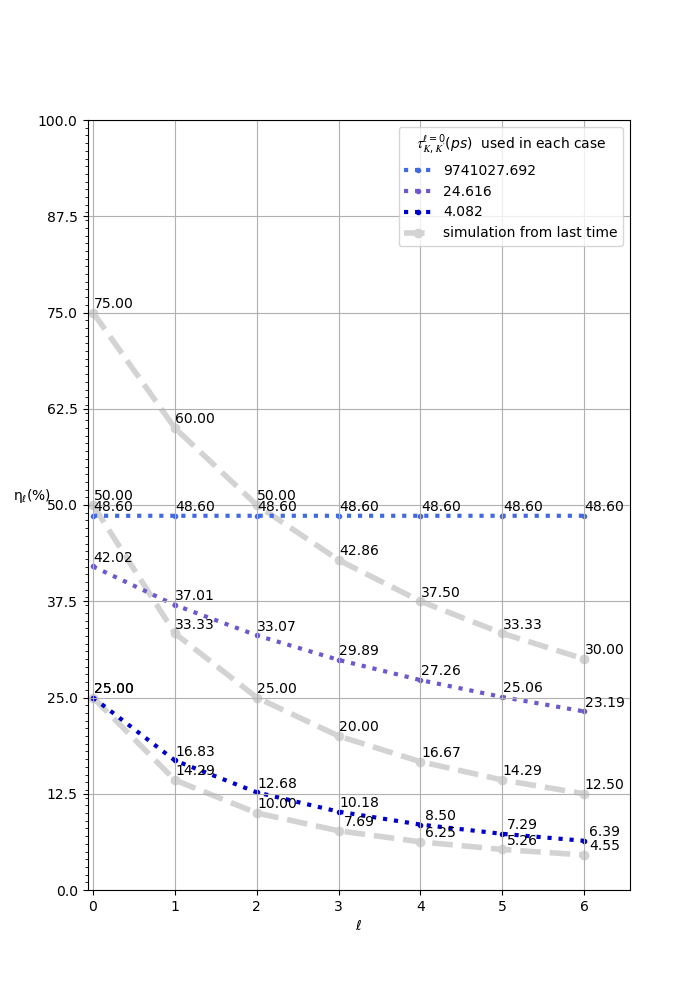

In [145]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
Color = ['royalblue', 'slateblue', 'mediumblue']
# Color = ['darkseagreen', 'darkolivegreen', 'forestgreen']

# def tau(l):
#     l = np.abs(l)
#     Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) *1774.5
#     return Tau


for tauB_with_trion in range(0, 3, 1):
    globals()['B'+str(tauB_with_trion)] = []
    for l in range(0,7,1):
        add = 100*DoP_with_trion(l, muti[tauB_with_trion]) 
        # print("with_trion",add)
        globals()['B'+str(tauB_with_trion)] += [add]
        
for tauB_with_trion in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB_with_trion)], marker='.', linestyle='dotted', color=Color[tauB_with_trion] , label='tauB_with_trion = '+str(t_B_with_trion[tauB_with_trion]) ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(tauB_with_trion)]):
        ax.text(i+0.25, v+0.6, "%2.2f" %v, ha="center")  


for tauB in range(0, 3, 1):
    globals()['B'+str(tauB)] = []
    for l in range(0,7,1):
        add = 100*DoP(l, t_B[tauB])
        print(add)
        globals()['B'+str(tauB)] += [add]
        
for tauB in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB)], marker='o', linestyle='dashed', color="lightgray" , label='tauB = '+str(t_B[tauB]) ,linewidth=4, zorder=0)
    for i, v in enumerate(globals()['B'+str(tauB)]):
        ax.text(i+0.25, v+0.6, "%2.2f" %v, ha="center")

      
        
        
        
        
ax.grid()
ax.legend([f'{(muti[0]*tau_for_exciton(0)):4.3f}',f'{(muti[1]*tau_for_exciton(0)):4.3f}', f'{(muti[2]*tau_for_exciton(0)):4.3f}', 'simulation from last time'], title="$𝜏_{𝐾,𝐾^′}^{\ell=0} (ps)$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
ax.set_yticks(np.arange(0, 101, 100/8))
ax.set_yticks(np.arange(0, 101, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

NameError: name 'DoP_only_trion' is not defined

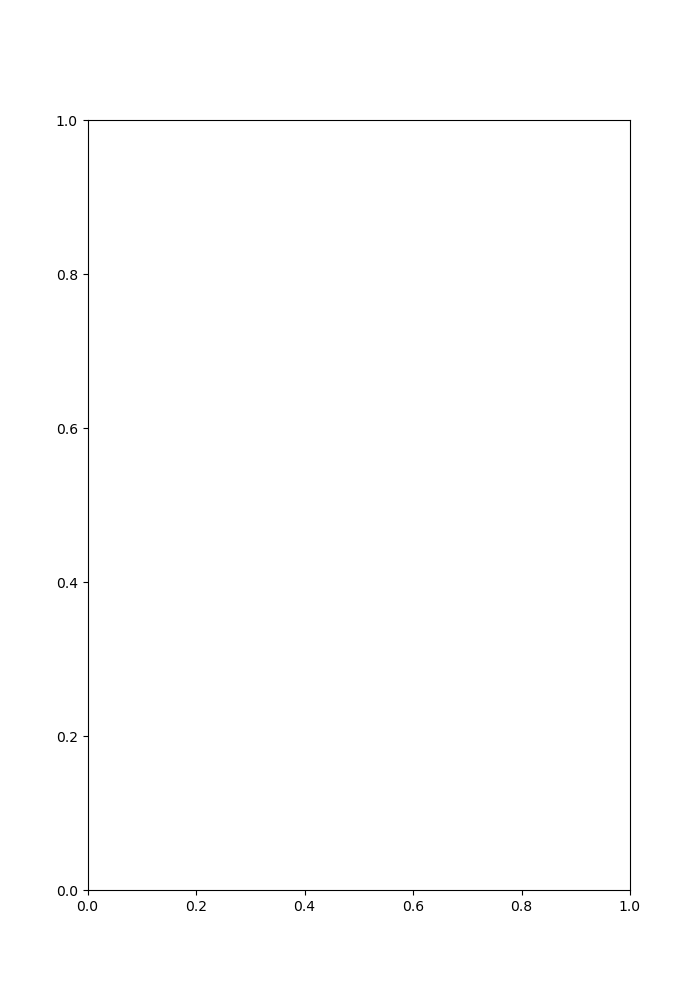

In [100]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['palegreen', 'darkseagreen', 'yellowgreen', 'darkolivegreen']

for tauB_with_trion in range(0, 4, 1):
    globals()['B'+str(tauB_with_trion)] = []
    for l in range(0,7,1):
        add = 100*DoP_only_trion(l, muti[tauB_with_trion]) 
        # print("with_trion",add)
        globals()['B'+str(tauB_with_trion)] += [add]
        
for tauB_with_trion in range(0, 4, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(tauB_with_trion)], marker='.', linestyle='dotted', color=Color[tauB_with_trion] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(tauB_with_trion)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{(1/muti[0]*tau_for_exciton(0)):4.3f}',f'{(1/muti[1]*tau_for_exciton(0)):4.3f}', f'{(1/muti[2]*tau_for_exciton(0)):4.3f}', f'{(1/muti[3]*tau_for_exciton(0)):4.3f}'], title="1/$𝜏_{𝐾,𝐾^′}^{\ell=0} (ps)$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{T}$(%)', rotation=0)
ax.set_yticks(np.arange(0, 26, 25/8))
ax.set_yticks(np.arange(0, 26, 25/100), minor=True)
ax.set_ylim(0, 25)
plt.show()

In [86]:
l=0
muti=1.25*np.power(10,4)

In [87]:
GK - NK(l, muti)/t_r - f*NK(l, muti) + d*nK(l, muti) + NKprime(l, muti)/tau(l, muti) - NK(l, muti)/tau(l, muti)

1.6155871338926322e-27

In [88]:
-nK(l, muti)/t_t + f*NK(l, muti) - d*nK(l, muti) + nKprime(l, muti)/taut - nK(l, muti)/taut

-2.5849394142282115e-26

In [89]:
-NKprime(l, muti)/t_r - f*NKprime(l, muti) + d*nKprime(l, muti) + NK(l, muti)/tau(l, muti) - NKprime(l, muti)/tau(l, muti)

-1.0097419586828951e-28

In [90]:
-nKprime(l, muti)/t_t + f*NKprime(l, muti) - d*nKprime(l, muti) + nK(l, muti)/taut - nKprime(l, muti)/taut

0.0

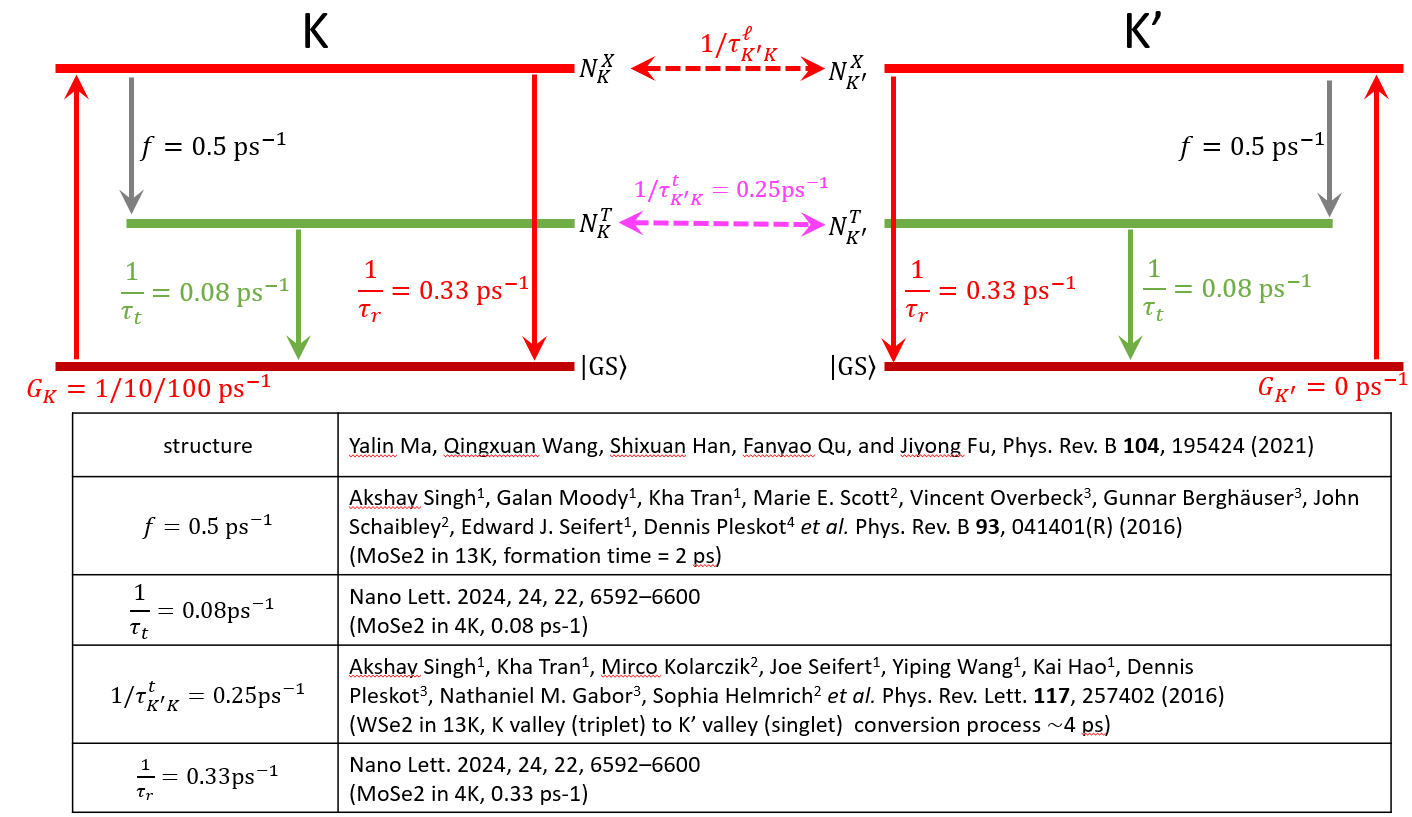

# exciton light + trion light

In [91]:
# def tau(l):
#     l = np.abs(l)
#     Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) )
#     return Tau

def tau(l, multi):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * multi
    return Tau

In [100]:
f = 0.5 # ps-1
# f=0
t_t = 1/0.08 #ps
tau_t = 1/0.25 #ps
t_r = 1/0.33 #ps

print('f =',f)
print('1/t_t =',1/t_t)
print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)

def Dop(l,multi):
    Dop = ( (1/t_r+f) * ((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t)) ) / ( (1/t_r+f+2/tau(l, multi)) * ((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t+2/tau_t)) )
    return Dop

f = 0.5
1/t_t = 0.08
1/tau_t = 0.01
1/t_r = 0.33


In [101]:
print(1/t_r+f)

0.8300000000000001


In [102]:
print((1/t_t+1/tau_t)**2-(1/tau_t)**2)

0.008


In [103]:
print((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t) )

0.048


In [104]:
print(((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t+2/tau_t)))

0.058


In [105]:
print(1/t_t+2/tau_t)

0.1


In [106]:
# multi = [np.power(10, 6), np.power(10, 3), np.power(10, 2.23)]
multi = [np.power(10, 6), 1233.3818, 411.12728964460706, 137.04242988153567]
# 1233.3818689338211
# 411.12728964460706
# multi = [np.power(10, 3.49175), np.power(10, 3.0145), np.power(10, 2.5375)]

C:\Users\nycugpu\AppData\Local\Temp\ipykernel_8416\2957609246.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7, 10), dpi=100)


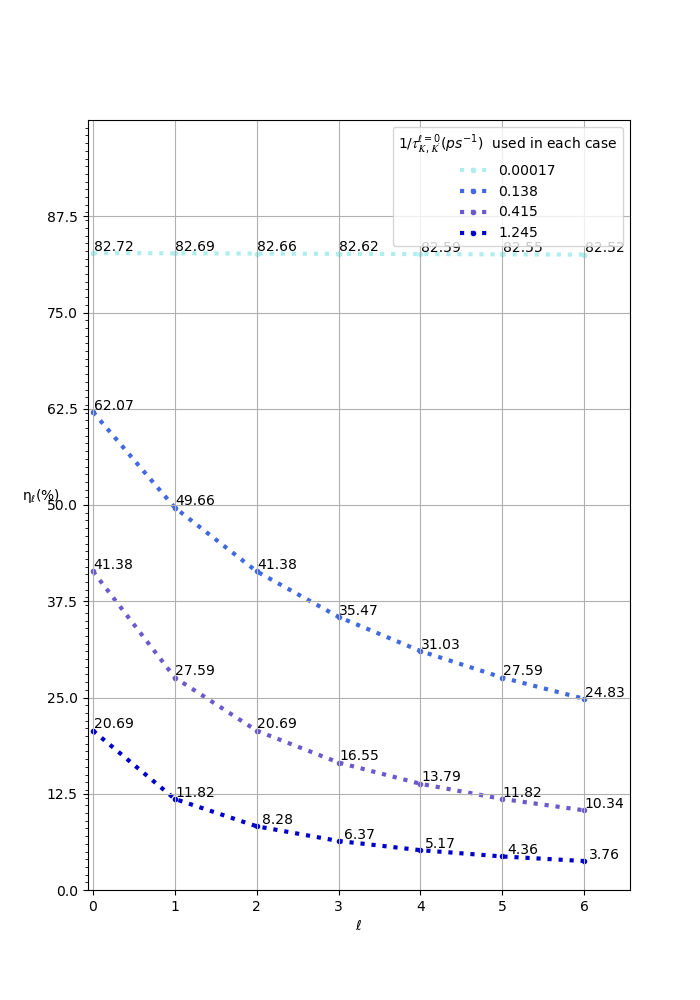

In [107]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['paleturquoise', 'royalblue', 'slateblue', 'mediumblue']

for i in range(0, 4, 1):
    globals()['B'+str(i)] = []
    for l in range(0,7,1):
        add = 100*Dop(l,multi[i])
        # print("with_trion",add)
        globals()['B'+str(i)] += [add]
        
for i in range(0, 4, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(i)], marker='.', linestyle='dotted', color=Color[i] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(i)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{1/(multi[0]*tau(0,1)):4.5f}',f'{1/(multi[1]*tau(0,1)):4.3f}', f'{1/(multi[2]*tau(0,1)):4.3f}', f'{1/(multi[3]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case", loc='upper right')
# ax.legend([f'{1/(multi[0]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
# ax.set_yticks(np.arange(0, 31, 30/8))
# ax.set_yticks(np.arange(0, 31, 30/100), minor=True)
# ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 100, 100/8))
ax.set_yticks(np.arange(0, 100, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

# only exciton light

In [52]:
def tau(l, multi):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * multi
    return Tau

In [53]:
f = 0.5 # ps-1
# f = 0
t_t = 1/0.08 #ps
tau_t = 1/0.25 #ps
t_r = 1/0.33 #ps

print('f =',f)
print('1/t_t =',1/t_t)
print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)

def Dop(l,multi):
    Dop = (1/t_r+f) /(1/t_r+f+2/tau(l, multi))
    return Dop

f = 0.5
1/t_t = 0.08
1/tau_t = 0.25
1/t_r = 0.33


In [54]:
target = [0.75, 0.5, 0.25]
multi = []
for i in range(3):
    multi += [ 2*target[i] / ((1/t_r+f)*(1-target[i])) / tau(l=0, multi=1)]
    print(multi[i])

1233.3818689338211
411.12728964460706
137.04242988153567


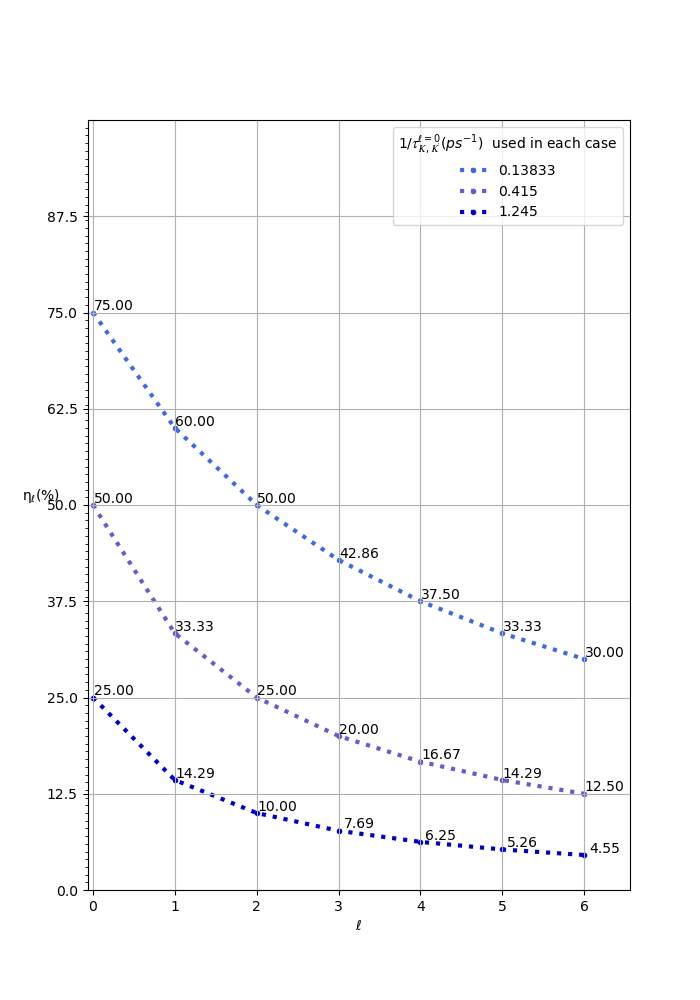

In [55]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['royalblue', 'slateblue', 'mediumblue']

for i in range(0, 3, 1):
    globals()['B'+str(i)] = []
    for l in range(0,7,1):
        add = 100*Dop(l,multi[i])
        # print("with_trion",add)
        globals()['B'+str(i)] += [add]
        
for i in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(i)], marker='.', linestyle='dotted', color=Color[i] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(i)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{1/(multi[0]*tau(0,1)):4.5f}',f'{1/(multi[1]*tau(0,1)):4.3f}', f'{1/(multi[2]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case", loc='upper right')
# ax.legend([f'{1/(multi[0]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
# ax.set_yticks(np.arange(0, 31, 30/8))
# ax.set_yticks(np.arange(0, 31, 30/100), minor=True)
# ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 100, 100/8))
ax.set_yticks(np.arange(0, 100, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

# only trion light

In [56]:
def tau(l, multi):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * multi
    return Tau

In [57]:
f = 0.5 # ps-1
# f = 0
t_t = 1/0.08 #ps
tau_t = 1/0.25 #ps
t_r = 1/0.33 #ps

print('f =',f)
print('1/t_t =',1/t_t)
print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)

def Dop(l,multi):
    Dop = ((1/t_r+f)*(1/t_t)) / ((1/t_r+f+2/tau(l, multi))*(1/t_t+2/tau_t))
    return Dop

f = 0.5
1/t_t = 0.08
1/tau_t = 0.25
1/t_r = 0.33


In [58]:
# multi = [np.power(10, 6), np.power(10, 3), np.power(10, 2.23)]
multi = [np.power(10, 6), 1233.3818, 411.12728964460706, 137.04242988153567]

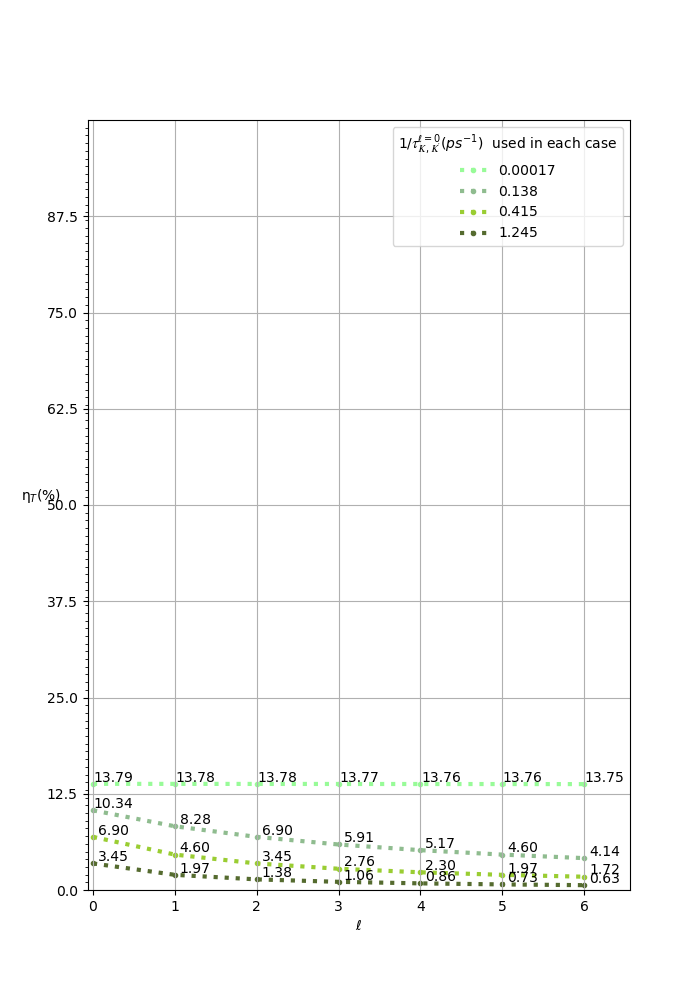

In [59]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['palegreen', 'darkseagreen', 'yellowgreen', 'darkolivegreen']

for i in range(0, 4, 1):
    globals()['B'+str(i)] = []
    for l in range(0,7,1):
        add = 100*Dop(l,multi[i])
        # print("with_trion",add)
        globals()['B'+str(i)] += [add]
        
for i in range(0, 4, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(i)], marker='.', linestyle='dotted', color=Color[i] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(i)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{1/(multi[0]*tau(0,1)):4.5f}',f'{1/(multi[1]*tau(0,1)):4.3f}', f'{1/(multi[2]*tau(0,1)):4.3f}', f'{1/(multi[3]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case", loc='upper right')
# ax.legend([f'{1/(multi[0]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{T}$(%)', rotation=0)
# ax.set_yticks(np.arange(0, 31, 30/8))
# ax.set_yticks(np.arange(0, 31, 30/100), minor=True)
# ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 100, 100/8))
ax.set_yticks(np.arange(0, 100, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

In [60]:
GK = 10  #ps^-1
f = 0.5 # ps-1
# f = 0
t_t = 1/0.08 #ps
tau_t = 1/0.25 #ps
t_r = 1/0.33 #ps

def tau(l, muti):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * muti
    return Tau

def NK(l, muti):
    l = np.abs(l)
    NK = GK*(1/t_r+f+1/tau(l, muti)) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2)
    return NK

def NKprime(l, muti):
    l = np.abs(l)
    NKprime = GK/tau(l, muti) / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2)
    return NKprime

def nK(l, muti):
    l = np.abs(l)
    nK = (GK*f / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2))  *  (  ( (1/t_r+f+1/tau(l, muti))*(1/t_t+1/tau_t) + ((1/tau_t)*(1/tau(l, muti))) )  /  ((1/t_t+1/tau_t)**2-(1/tau_t)**2)  )
    return nK

def nKprime(l, muti):
    l = np.abs(l)
    nKprime = (GK*f / ((1/t_r+f+1/tau(l, muti))**2-(1/tau(l, muti))**2))  *  (  ( (1/tau(l, muti))*(1/t_t+1/tau_t) + (1/tau_t)*(1/t_r+f+1/tau(l, muti)) )  /  ((1/t_t+1/tau_t)**2-(1/tau_t)**2)  )
    return nKprime


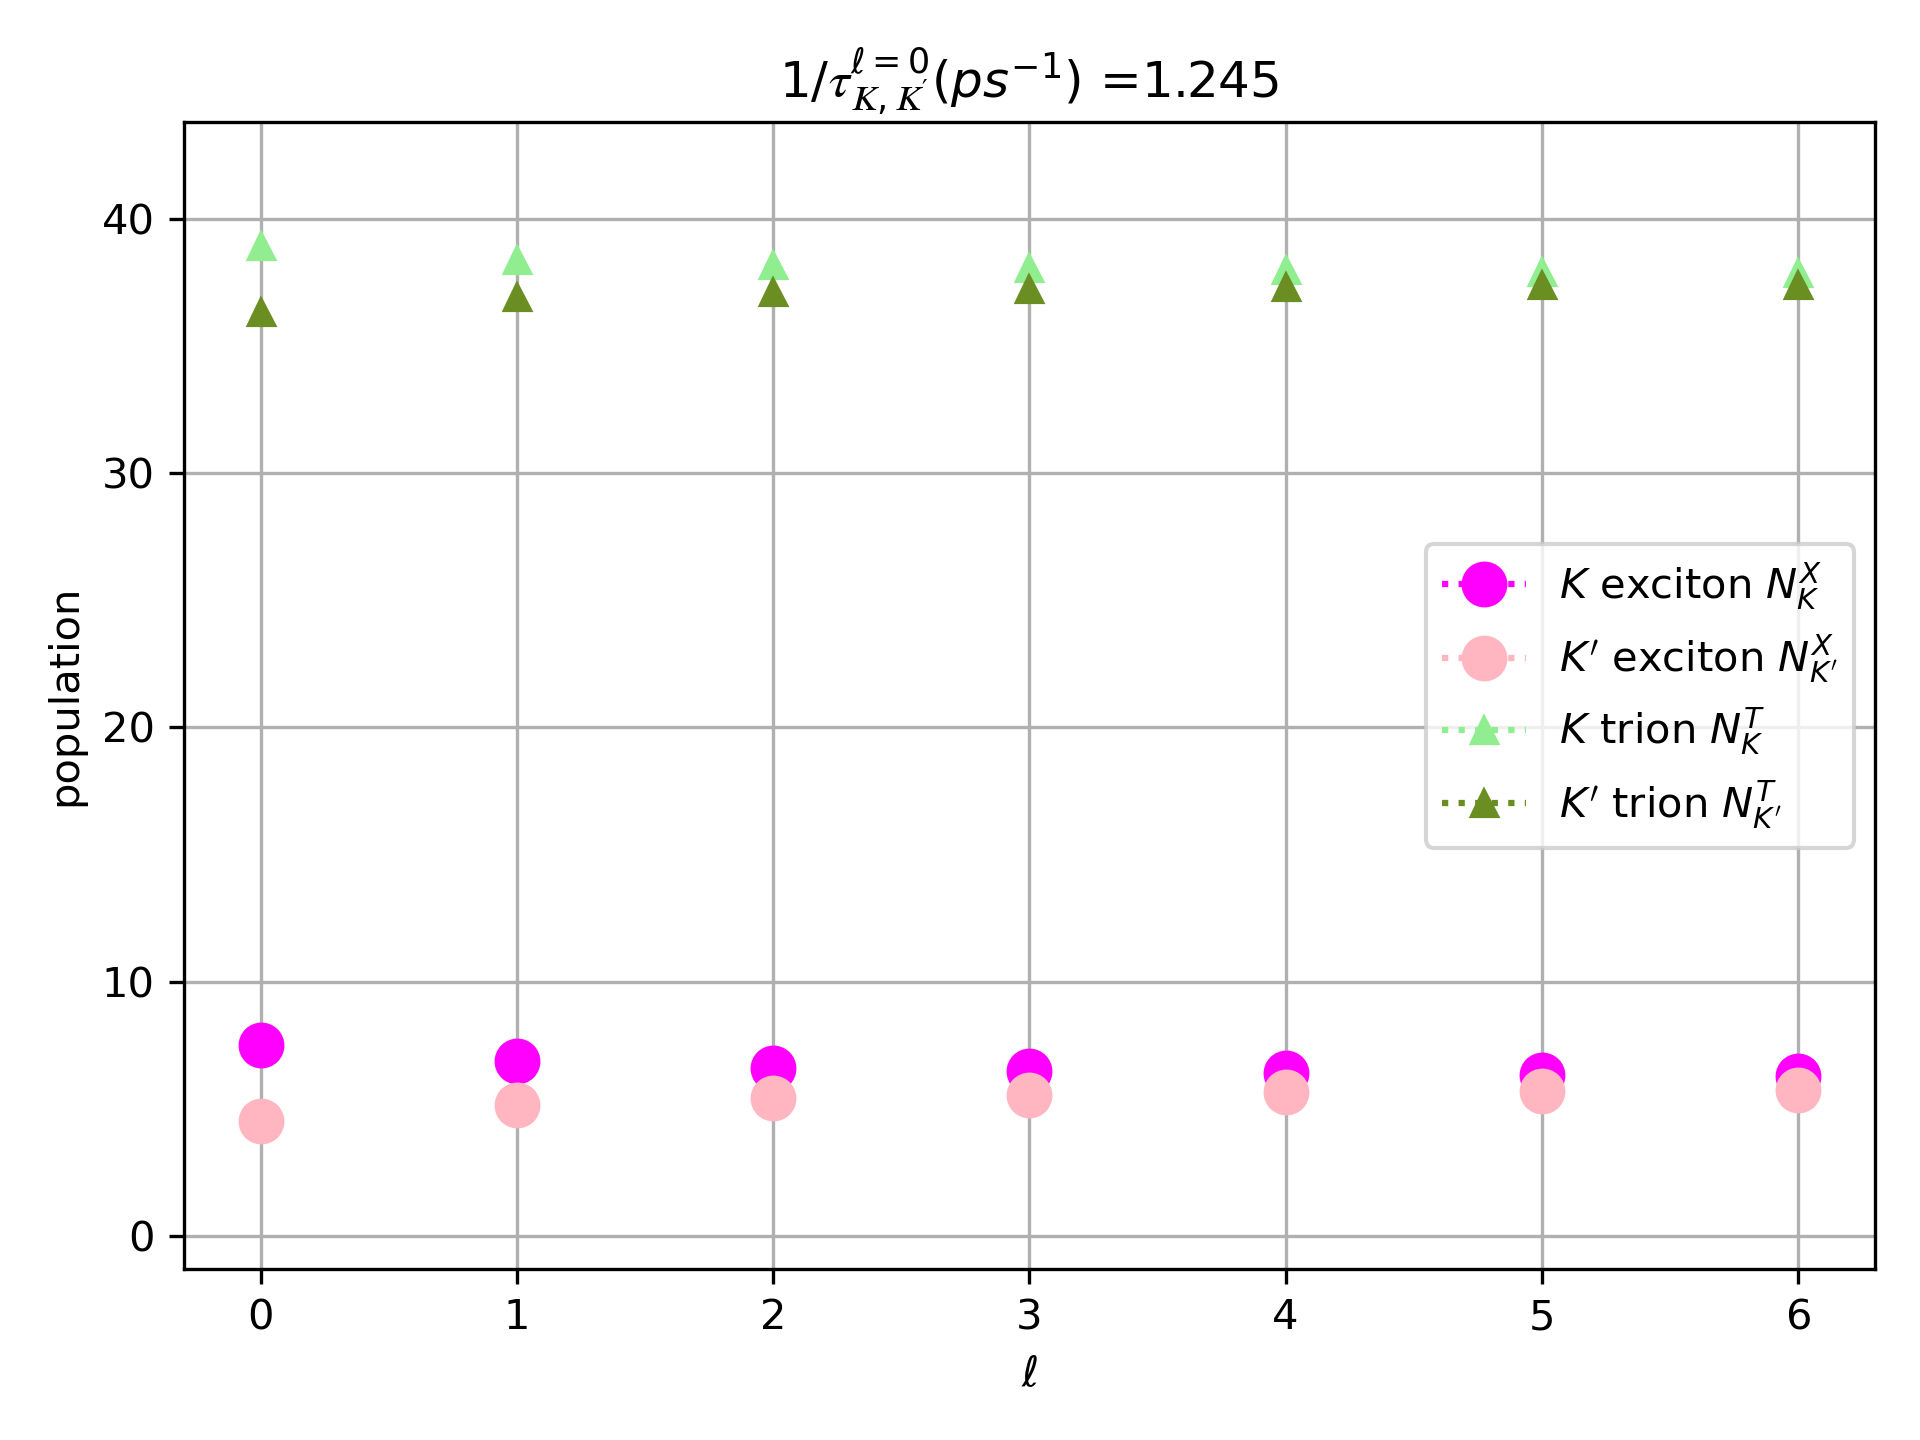

In [98]:
#multi = [np.power(10, 6), 1233.3818, 411.12728964460706, 137.04242988153567]
muti = 137.04242988153567

fig, ax1 = plt.subplots(dpi=300)

color = 'tab:red'
ax1.set_xlabel('$\ell$')
ax1.set_ylabel('population')
for l in np.arange(0, 7, 1):
    ax1.plot(l, NK(l, muti), marker='o', markersize=10, linestyle='dotted', color="magenta", label="$N^{X}_{K}$")
    ax1.plot(l, NKprime(l, muti), marker='o', markersize=10, linestyle='dotted', color="lightpink", label="$N^{X}_{K'}$")
    ax1.plot(l, nK(l, muti), marker='^', linestyle='dotted', color="lightgreen", label="$N^{T}_{K}$")
    ax1.plot(l, nKprime(l, muti), marker='^', linestyle='dotted', color="olivedrab", label="$N^{T}_{K'}$")
# ax1.tick_params(axis='y')

# ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('trion concentration')  # we already handled the x-label with ax1
# for l in np.arange(0, 7, 1):
#     ax2.plot(l, nK(l, muti), marker='^', linestyle='dotted', color="lightgreen", label="$N^{T}_{K}$")
#     ax2.plot(l, nKprime(l, muti), marker='^', linestyle='dotted', color="olivedrab", label="$N^{T}_{K'}$")
# ax2.tick_params(axis='y')

# ax1.legend(["$K$ exciton $N^{X}_{K}$", "$K'$ exciton $N^{X}_{K'}$"])
# ax2.legend(["$K$ trion $N^{T}_{K}$", "$K'$ trion $N^{T}_{K'}$"], loc='lower right')
ax1.legend(["$K$ exciton $N^{X}_{K}$", "$K'$ exciton $N^{X}_{K'}$", "$K$ trion $N^{T}_{K}$", "$K'$ trion $N^{T}_{K'}$"], loc='right')
ax1.grid()
ax1.set_ylim(-1.3, 43.8)

ax1.set_title('$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$ ='+str(format(1/(muti*tau(0,1)),'.3f')))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [31]:
# def Dop(l,multi):
#     Dop = (NK(l, muti)-NKprime(l, muti)+nK(l, muti)-nKprime(l, muti))/(NK(l, muti)+NKprime(l, muti)+nK(l, muti)+nKprime(l, muti))
#     return Dop

# def Dop(l,multi):
#     Dop = (NK(l, muti)-NKprime(l, muti))/(NK(l, muti)+NKprime(l, muti))
#     return Dop

def Dop(l,multi):
    Dop = (nK(l, muti)-nKprime(l, muti))/(nK(l, muti)+nKprime(l, muti))
    return Dop

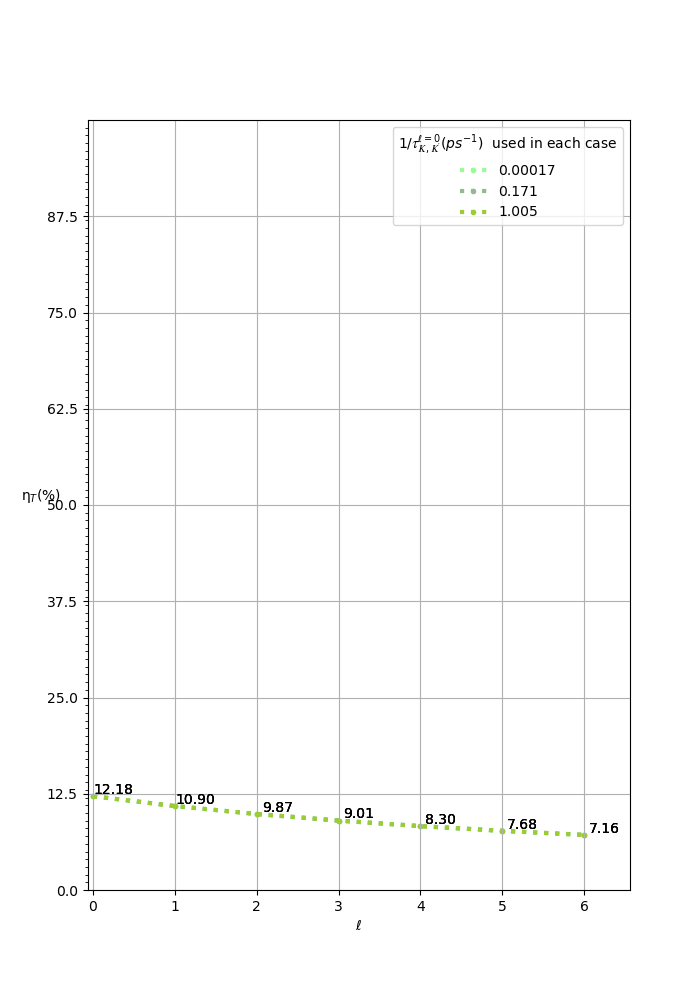

In [32]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['palegreen', 'darkseagreen', 'yellowgreen', 'darkolivegreen']

for i in range(0, 3, 1):
    globals()['B'+str(i)] = []
    for l in range(0,7,1):
        add = 100*Dop(l,multi[i])
        # print("with_trion",add)
        globals()['B'+str(i)] += [add]
        
for i in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(i)], marker='.', linestyle='dotted', color=Color[i] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(i)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{1/(multi[0]*tau(0,1)):4.5f}',f'{1/(multi[1]*tau(0,1)):4.3f}', f'{1/(multi[2]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case", loc='upper right')
# ax.legend([f'{1/(multi[0]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{T}$(%)', rotation=0)
# ax.set_yticks(np.arange(0, 31, 30/8))
# ax.set_yticks(np.arange(0, 31, 30/100), minor=True)
# ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 100, 100/8))
ax.set_yticks(np.arange(0, 100, 100/100), minor=True)
ax.set_ylim(0, 100)
plt.show()

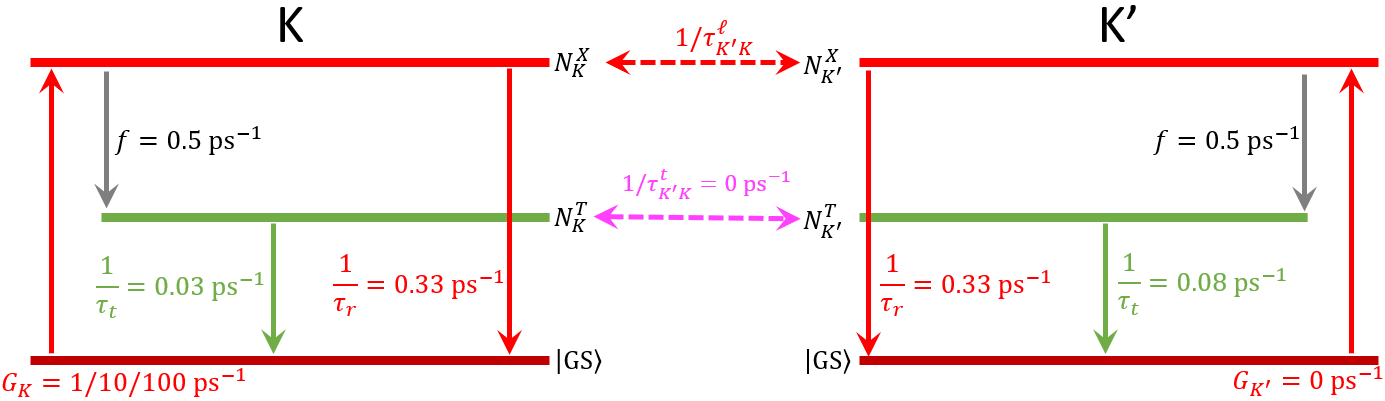

# exciton light + trion light

In [61]:
# def tau(l):
#     l = np.abs(l)
#     Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) )
#     return Tau

def tau(l, multi):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * multi
    return Tau

In [62]:
f = 0.5 # ps-1
# f=0
t_t = 30 #ps
tau_t = 1/0.00482 #ps-1
t_r = 3 #ps

print('f =',f)
print('1/t_t =',1/t_t)
print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)

def Dop(l,multi):
    # Dop = ( (1/t_r+f) * ((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t)) ) / ( (1/t_r+f+2/tau(l, multi)) * ((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t+2/tau_t)) )
    Dop = (1/t_r+f) * (1/t_t+f+2/tau_t) * (1/t_t) / ( (1/t_r+f+2/tau(l, multi)) * (1/t_t+2/tau_t) * (1/t_t+f) )
    return Dop

f = 0.5
1/t_t = 0.03333333333333333
1/tau_t = 0.00482
1/t_r = 0.3333333333333333


In [63]:
multi = [2.12*np.power(10, 4), 1233.3818, 411.12728964460706, 137.04242988153567]

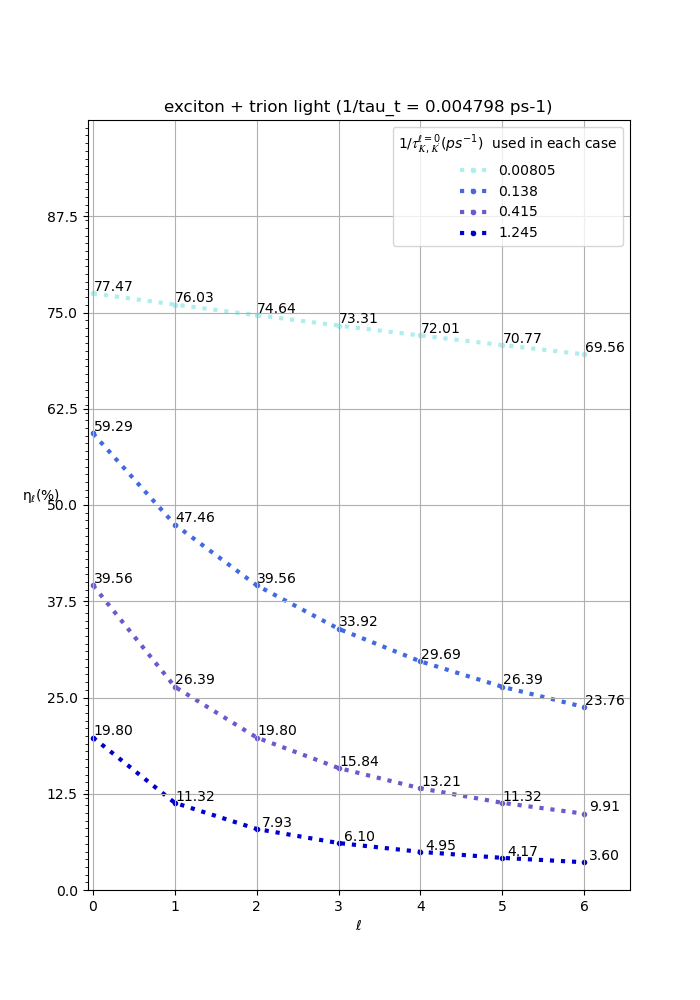

In [64]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['paleturquoise', 'royalblue', 'slateblue', 'mediumblue']

for i in range(0, 4, 1):
    globals()['B'+str(i)] = []
    for l in range(0,7,1):
        add = 100*Dop(l,multi[i])
        # print("with_trion",add)
        globals()['B'+str(i)] += [add]
        
for i in range(0, 4, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(i)], marker='.', linestyle='dotted', color=Color[i] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(i)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{1/(multi[0]*tau(0,1)):4.5f}',f'{1/(multi[1]*tau(0,1)):4.3f}', f'{1/(multi[2]*tau(0,1)):4.3f}', f'{1/(multi[3]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case", loc='upper right')
# ax.legend([f'{1/(multi[0]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
# ax.set_yticks(np.arange(0, 31, 30/8))
# ax.set_yticks(np.arange(0, 31, 30/100), minor=True)
# ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 100, 100/8))
ax.set_yticks(np.arange(0, 100, 100/100), minor=True)
ax.set_ylim(0, 100)
ax.set_title("exciton + trion light (1/tau_t = 0.004798 ps-1)")
plt.show()

# only exciton light

In [65]:
def tau(l, multi):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * multi
    return Tau

In [66]:
f = 0.5 # ps-1
# f=0
t_t = 30 #ps
tau_t =  np.inf #ps-1
# tau_t =  1/0.0492 #ps-1
t_r = 3 #ps

print('f =',f)
print('1/t_t =',1/t_t)
print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)

def Dop(l,multi):
    Dop = (1/t_r+f) /(1/t_r+f+2/tau(l, multi))
    return Dop

f = 0.5
1/t_t = 0.03333333333333333
1/tau_t = 0.0
1/t_r = 0.3333333333333333


In [67]:
target = [0.75, 0.5, 0.25]
multi = []
for i in range(3):
    multi += [ 2*target[i] / ((1/t_r+f)*(1-target[i])) / tau(l=0, multi=1)]
    print(multi[i])

1228.4483414580861
409.48278048602873
136.49426016200957


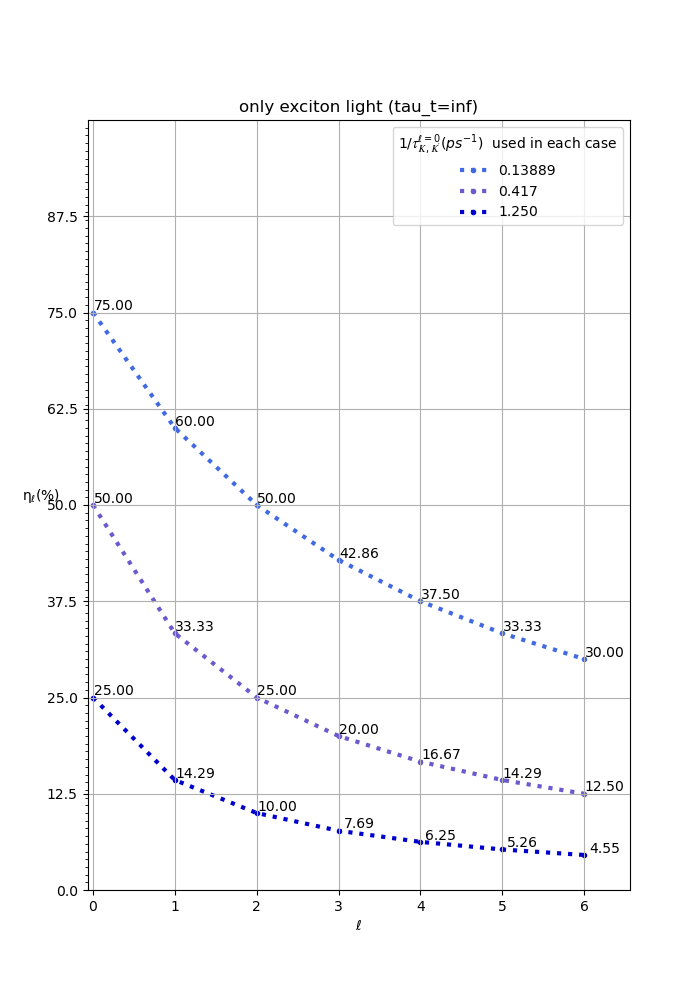

In [68]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['royalblue', 'slateblue', 'mediumblue']

for i in range(0, 3, 1):
    globals()['B'+str(i)] = []
    for l in range(0,7,1):
        add = 100*Dop(l,multi[i])
        # print("with_trion",add)
        globals()['B'+str(i)] += [add]
        
for i in range(0, 3, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(i)], marker='.', linestyle='dotted', color=Color[i] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(i)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{1/(multi[0]*tau(0,1)):4.5f}',f'{1/(multi[1]*tau(0,1)):4.3f}', f'{1/(multi[2]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case", loc='upper right')
# ax.legend([f'{1/(multi[0]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{\ell}$(%)', rotation=0)
# ax.set_yticks(np.arange(0, 31, 30/8))
# ax.set_yticks(np.arange(0, 31, 30/100), minor=True)
# ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 100, 100/8))
ax.set_yticks(np.arange(0, 100, 100/100), minor=True)
ax.set_ylim(0, 100)
ax.set_title("only exciton light (tau_t=inf)")
plt.show()

# only trion light

In [69]:
def tau(l, multi):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) ) * multi
    return Tau

In [70]:
f = 0.5 # ps-1
# f=0
t_t = 30 #ps
tau_t =  np.inf #ps-1
tau_t = 1/0.00482 #ps-1
t_r = 3 #ps

print('f =',f)
print('1/t_t =',1/t_t)
print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)

def Dop(l,multi):
    Dop = ((1/t_r+f)*(1/t_t)) / ((1/t_r+f+2/tau(l, multi))*(1/t_t+2/tau_t))
    return Dop

f = 0.5
1/t_t = 0.03333333333333333
1/tau_t = 0.00482
1/t_r = 0.3333333333333333


In [71]:
# multi = [np.power(10, 4), 1233.3818, 411.12728964460706, 137.04242988153567]
multi = [2.12*np.power(10, 4), 1233.3818, 411.12728964460706, 137.04242988153567]

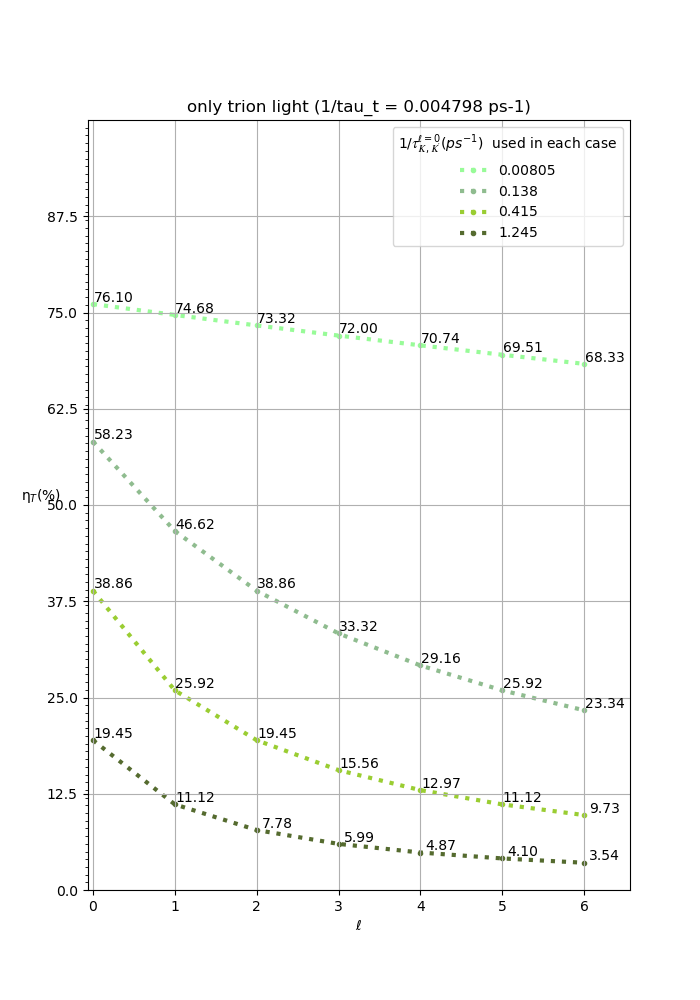

In [72]:
fig, ax = plt.subplots(figsize=(7, 10), dpi=100)

# t_B = [0.00877, 0.002928, 0.000974]
# t_B_with_trion = [0.00018785424098120655, 0.0005635627229436196, 0.0016906881688308589]
# Color = ['royalblue', 'slateblue', 'mediumblue']
Color = ['palegreen', 'darkseagreen', 'yellowgreen', 'darkolivegreen']

for i in range(0, 4, 1):
    globals()['B'+str(i)] = []
    for l in range(0,7,1):
        add = 100*Dop(l,multi[i])
        # print("with_trion",add)
        globals()['B'+str(i)] += [add]
        
for i in range(0, 4, 1):
    ax.plot( np.linspace(0, 6, 7), globals()['B'+str(i)], marker='.', linestyle='dotted', color=Color[i] ,linewidth=3, zorder=1)
    for i, v in enumerate(globals()['B'+str(i)]):
        ax.text(i+0.25, v+0.3, "%2.2f" %v, ha="center")         
        
        
ax.grid()
ax.legend([f'{1/(multi[0]*tau(0,1)):4.5f}',f'{1/(multi[1]*tau(0,1)):4.3f}', f'{1/(multi[2]*tau(0,1)):4.3f}', f'{1/(multi[3]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case", loc='upper right')
# ax.legend([f'{1/(multi[0]*tau(0,1)):4.3f}'], title="$1/𝜏_{𝐾,𝐾^′}^{\ell=0} (ps^{-1})$  used in each case")
ax.set_xlabel('$\ell$')
ax.set_xticks(np.linspace(0, 6, 7))
ax.set_xlim(-0.067, 6.56)
ax.set_ylabel('η$_{T}$(%)', rotation=0)
# ax.set_yticks(np.arange(0, 31, 30/8))
# ax.set_yticks(np.arange(0, 31, 30/100), minor=True)
# ax.set_ylim(0, 30)
ax.set_yticks(np.arange(0, 100, 100/8))
ax.set_yticks(np.arange(0, 100, 100/100), minor=True)
ax.set_ylim(0, 100)
ax.set_title("only trion light (1/tau_t = 0.004798 ps-1)")
plt.show()

# fix tau_l

In [116]:
tau_l = 0.25 #ps  (250 fs)

f = 0.5 # ps-1
# f=0
t_t = 15 #ps
# tau_t = np.inf #ps-1
# tau_t = 1/0.00482 #ps-1
# tau_t = tau_l*1.6 #ps-1
t_r = 3 #ps  


print('f =',f)
print('1/t_t =',1/t_t)
# print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)
print('1/tau_l =',1/tau_l)

def Both_fun(tau_t, f,t_t,t_r, tau_l):
    Both = 100*(  ( (1/t_r+f) * ((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t)) ) / ( (1/t_r+f+2/tau_l) * ((1/t_t+1/tau_t)**2-(1/tau_t)**2+f*(1/t_t+2/tau_t)) )  )
    return Both

def onlyE_fun(tau_t, f,t_t,t_r, tau_l):
    onlyE = 100*(  (1/t_r+f) /(1/t_r+f+2/tau_l)  )
    return onlyE

def onlyT_fun(tau_t, f,t_t,t_r, tau_l):
    onlyT = 100*(  ((1/t_r+f)*(1/t_t)) / ((1/t_r+f+2/tau_l)*(1/t_t+2/tau_t))  )
    return onlyT

def NK(GK, f,t_t,t_r, tau_l, tau_t):
    NK = GK*(1/t_r+f+1/tau_l) / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2)
    return NK

def NKprime(GK, f,t_t,t_r, tau_l, tau_t):
    NKprime = GK/tau_l / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2)
    return NKprime

def nK(GK, f,t_t,t_r, tau_l, tau_t):
    nK = (GK*f / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2))  *  (  ( (1/t_r+f+1/tau_l)*(1/t_t+1/tau_t) + ((1/tau_t)*(1/tau_l)) )  /  ((1/t_t+1/tau_t)**2-(1/tau_t)**2)  )
    return nK

def nKprime(GK, f,t_t,t_r, tau_l, tau_t):
    nKprime = (GK*f / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2))  *  (  ( (1/tau_l)*(1/t_t+1/tau_t) + (1/tau_t)*(1/t_r+f+1/tau_l) )  /  ((1/t_t+1/tau_t)**2-(1/tau_t)**2)  )
    return nKprime

f = 0.5
1/t_t = 0.06666666666666667
1/t_r = 0.3333333333333333
1/tau_l = 4.0


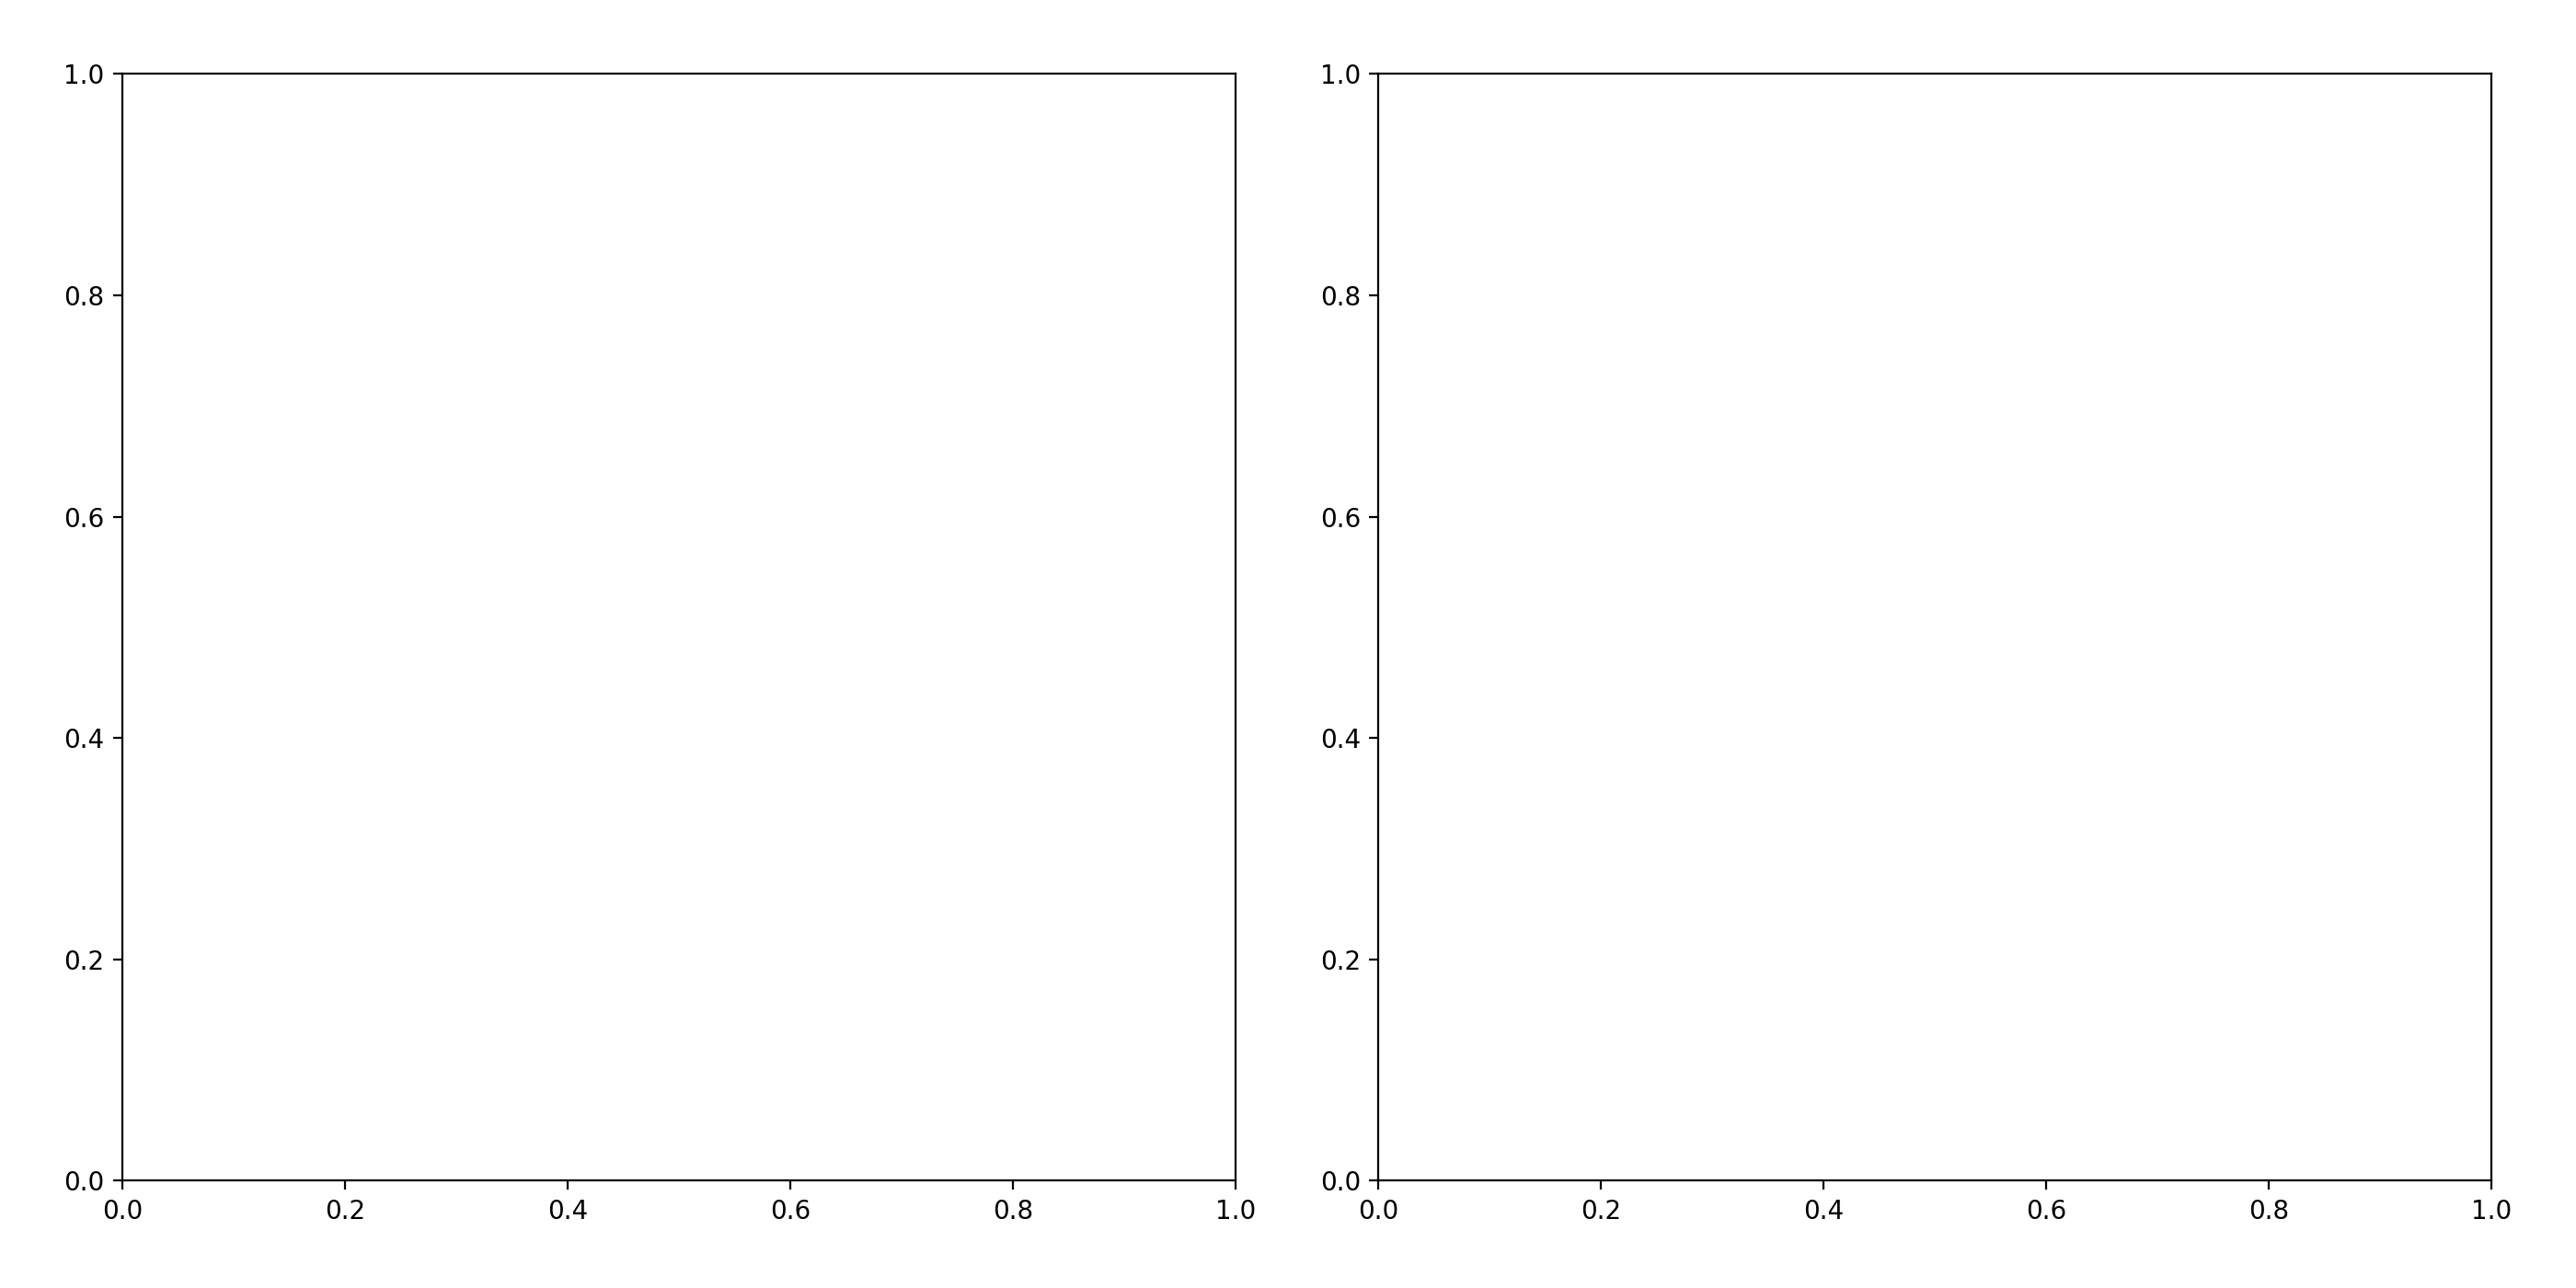

Output()

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7), dpi=200)

G = widgets.FloatSlider(value=1, min=1., max=100, step=1/51   ,layout=widgets.Layout(width='75%'), description='$1/{G_K}$ (ps), generation time')
τ_f = widgets.FloatSlider(value=2, min=0., max=20, step=1/51    ,layout=widgets.Layout(width='75%'), description='τ_f (ps), formation time')
t_t = widgets.FloatSlider(value=30, min=0., max=50, step=1/51 ,layout=widgets.Layout(width='75%'), description='t_t (ps), trion relaxation time')
t_r = widgets.FloatSlider(value=3, min=0., max=5, step=1/51   ,layout=widgets.Layout(width='75%'), description='t_r (ps), exciton relaxation time')
tau_x = widgets.FloatSlider(value=0.25, min=0.25, max=25, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_x (ps), exciton intervalley scattering time')
tau_t = widgets.FloatSlider(value=25, min=0.25, max=25, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_t (ps), trion intervalley scattering time')
    
def need(G, t_f,t_t,t_r, tau_x, tau_t):
    ax[0].cla()
    ax[1].cla()
    
    globals()['Both']  = []
    globals()['onlyE'] = []
    globals()['onlyT'] = []
    for each_tau_t in [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01]:
        add_Both = Both_fun(each_tau_t, t_f,t_t,t_r, tau_x)
        add_onlyE  =  onlyE_fun(each_tau_t, t_f,t_t,t_r, tau_x) 
        add_onlyT  =  onlyT_fun(each_tau_t, t_f,t_t,t_r, tau_x)
        globals()['Both']  += [add_Both]
        globals()['onlyE'] += [add_onlyE]
        globals()['onlyT'] += [add_onlyT]


    ax[1].semilogx( [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01], globals()['Both'],  marker='.', linestyle='dashdot', markersize=10, color='blueviolet' ,linewidth=1, zorder=3)
    ax[1].semilogx( [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01], globals()['onlyE'], marker='v', linestyle='solid', markersize=10, color='red' ,linewidth=0.75, zorder=2)
    ax[1].semilogx( [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01], globals()['onlyT'], marker='^', linestyle='dotted', markersize=10, color='mediumseagreen' ,linewidth=3, zorder=2)
    
    ax[1].grid()
    ax[1].legend(['η$_{XT}$', 'η$_X$', 'η$_T$'], fontsize=12, title='cases', loc='upper right')
    ax[1].set_xlabel('$τ_{KK\'}^{t}$ (ps)', fontsize=16)
    ax[1].set_ylabel('η(%)', fontsize=16, rotation=0)
    ax[1].set_ylim(-2, 100)
    ax[1].set_title('Dop dependent on $τ_{KK\'}^{t}$', fontsize=16)
    ax[1].set_yticks(np.arange(0, 101, 1), minor=True)
    
    print('f =',f)
    print('t_t =',t_t)
    print('t_r =',t_r)
    print('tau_x =',tau_x)
    print('tau_t =',tau_t)
    
    ax[0].grid(None)
    ax[0].axis('off')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    ax[0].hlines(0.05, 0, 1, color="maroon")
    ax[0].hlines(0.8, 0.05, 0.4, color="maroon")
    ax[0].hlines(0.8, 0.6, 0.95, color="maroon")
    ax[0].hlines(0.6, 0.1, 0.4, color="darkseagreen")
    ax[0].hlines(0.6, 0.6, 0.9, color="darkseagreen")
    
    
    ax[0].text(-0.02, 0.025, '$G_K$')
    ax[0].annotate('', xy=(0.07, 0.8), xytext=(0.07, 0.05), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    ax[0].text(0.16, 0.7, '$τ_f$ ='+str(format(t_f,'.0f'))+' ps')
    ax[0].text(0.86, 0.7, '$τ_f$ ='+str(format(t_f,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.15, 0.6), xytext=(0.15, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    ax[0].annotate('', xy=(0.85, 0.6), xytext=(0.85, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    
    ax[0].text(0.35, 0.45, '$τ_r$ ='+str(format(t_r,'.0f'))+' ps')
    ax[0].text(0.65, 0.45, '$τ_r$ ='+str(format(t_r,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.35, 0.05), xytext=(0.35, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    ax[0].annotate('', xy=(0.65, 0.05), xytext=(0.65, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    ax[0].text(0.15, 0.3, '$τ_t$ ='+str(format(t_t,'.0f'))+' ps')
    ax[0].text(0.85, 0.3, '$τ_t$ ='+str(format(t_t,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.15, 0.05), xytext=(0.15, 0.6), arrowprops=dict(arrowstyle='->', lw=2, color='darkseagreen'))
    ax[0].annotate('', xy=(0.85, 0.05), xytext=(0.85, 0.6), arrowprops=dict(arrowstyle='->', lw=2, color='darkseagreen'))
    
    ax[0].text(0.4, 0.82, '$τ_{KK\'}^{x}$ ='+str(format(tau_l,'.2f'))+' ps')
    ax[0].annotate('', xy=(0.4, 0.8), xytext=(0.6, 0.8), arrowprops=dict(arrowstyle='<->', lw=2, color='red'))
    
    ax[0].text(0.4, 0.62, '$τ_{KK\'}^t$ ='+str(format(tau_t,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.4, 0.6), xytext=(0.6, 0.6), arrowprops=dict(arrowstyle='<->', lw=2, color='fuchsia'))
    
    
#     for each_tau_t in [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01]:
#         ax[2].semilogx(each_tau_t, NK(1/G, 1/F,t_t,t_r, tau_l, each_tau_t)      , marker='v', markersize=10, linestyle='dotted', color="paleturquoise", label="$N^{X}_{K}$")
#         ax[2].semilogx(each_tau_t, NKprime(1/G, 1/F,t_t,t_r, tau_l, each_tau_t) , marker='v', markersize=10, linestyle='dotted', color="slateblue", label="$N^{X}_{K'}$")
#         ax[2].semilogx(each_tau_t, nK(1/G, 1/F,t_t,t_r, tau_l, each_tau_t)      , marker='^', markersize=10, linestyle='dotted', color="lightgreen", label="$N^{T}_{K}$")
#         ax[2].semilogx(each_tau_t, nKprime(1/G, 1/F,t_t,t_r, tau_l, each_tau_t) , marker='^', markersize=10, linestyle='dotted', color="olivedrab", label="$N^{T}_{K'}$")
        
#     ax[2].text(tau_t, 95, '$τ_{KK\'}^t$ ='+str(format(tau_t,'.2f'))+' (ps)')
#     ax[2].vlines(tau_t, -2, 10000, zorder=0, color='fuchsia')
        
#     ax[2].grid()
#     ax[2].legend(['$N^X_K$', '$N^X_{K\'}$', '$N^T_K$', '$N^T_{K\'}$'], title='cases', loc='upper right')
#     ax[2].set_xlabel('$τ_{KK\'}^{t}$ (ps)')
#     ax[2].set_ylabel('population')
#     ax[2].set_ylim(0, 20)
#     ax[2].set_title('population dependent on $τ_{KK\'}^{t}$')

plt.tight_layout(pad=2.5)
plt.show()

out = widgets.interactive_output(need, {'G':G, 't_f':t_f, 't_t':t_t, 't_r':t_r, 'tau_x':tau_x, 'tau_t':tau_t})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([G, t_f,t_t,t_r, tau_x, tau_t]) ])
display(ui , out )

# 嗚嗚釜

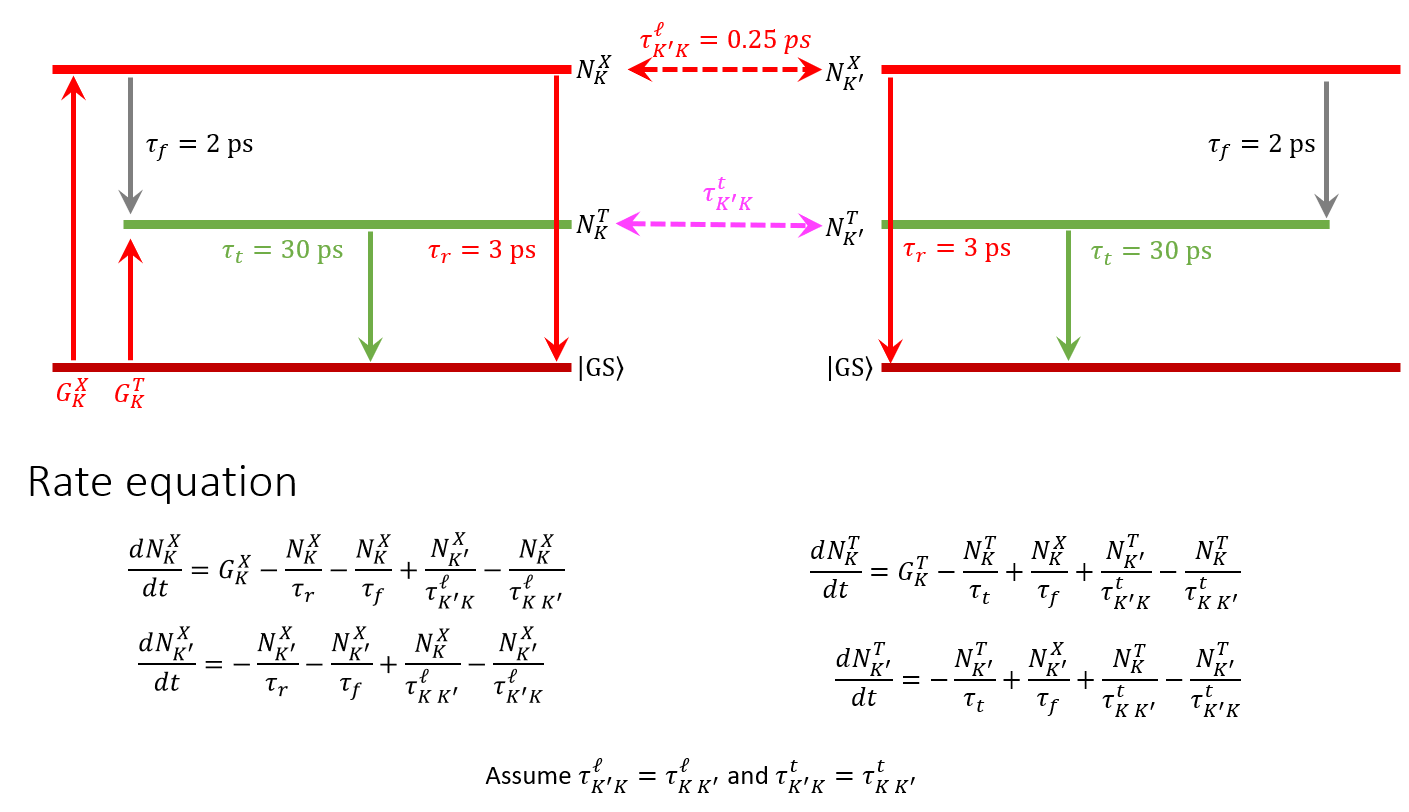

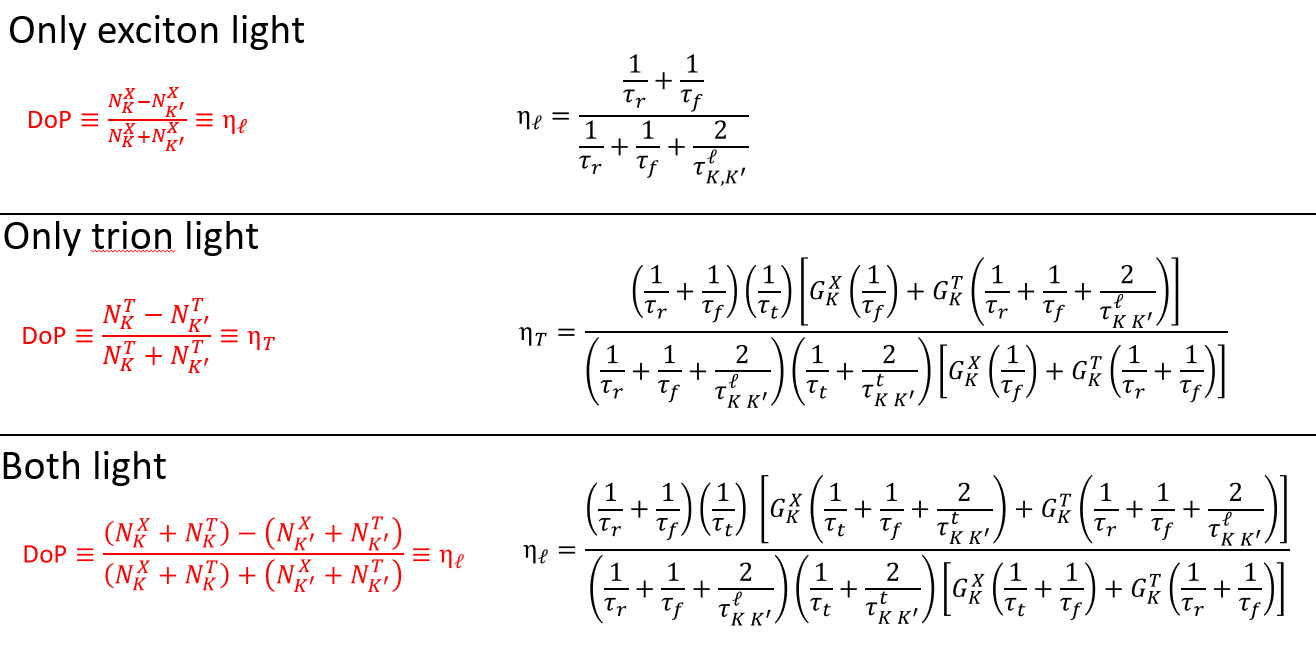

In [118]:
tau_l = 0.25 #ps  (250 fs)

t_f = 2 # ps-1
# f=0
t_t = 15 #ps
# tau_t = np.inf #ps-1
# tau_t = 1/0.00482 #ps-1
# tau_t = tau_l*1.6 #ps-1
t_r = 3 #ps  

GXTratio = 1


print('t_f =',t_f)
print('1/t_t =',1/t_t)
# print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)
print('1/tau_l =',1/tau_l)

def Both_fun(tau_t, t_f,t_t,t_r, tau_l, GXTratio):
    Both = 100* (1/t_r+1/t_f)*(1/t_t) * ( GXTratio*(1/t_t+1/t_f+2/tau_t)+(1/t_r+1/t_f+2/tau_l) ) / ( (1/t_r+1/t_f+2/tau_l)*(1/t_t+2/tau_t) * ( GXTratio*(1/t_t+1/t_f)+(1/t_r+1/t_f) ) )
    return Both

def onlyE_fun(tau_t, t_f,t_t,t_r, tau_l, GXTratio):
    onlyE = 100* (1/t_r+1/t_f) /(1/t_r+1/t_f+2/tau_l)
    return onlyE

def onlyT_fun(tau_t, t_f,t_t,t_r, tau_l, GXTratio):
    onlyT = 100* (1/t_r+1/t_f)*(1/t_t) * ( GXTratio*(1/t_f)+(1/t_r+1/t_f+2/tau_l) ) / ( (1/t_r+1/t_f+2/tau_l)*(1/t_t+2/tau_t) * ( GXTratio*(1/t_f)+(1/t_r+1/t_f) ) )
    return onlyT

# def NK(GK, f,t_t,t_r, tau_l, tau_t):
#     NK = GK*(1/t_r+f+1/tau_l) / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2)
#     return NK

# def NKprime(GK, f,t_t,t_r, tau_l, tau_t):
#     NKprime = GK/tau_l / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2)
#     return NKprime

# def nK(GK, f,t_t,t_r, tau_l, tau_t):
#     nK = (GK*f / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2))  *  (  ( (1/t_r+f+1/tau_l)*(1/t_t+1/tau_t) + ((1/tau_t)*(1/tau_l)) )  /  ((1/t_t+1/tau_t)**2-(1/tau_t)**2)  )
#     return nK

# def nKprime(GK, f,t_t,t_r, tau_l, tau_t):
#     nKprime = (GK*f / ((1/t_r+f+1/tau_l)**2-(1/tau_l)**2))  *  (  ( (1/tau_l)*(1/t_t+1/tau_t) + (1/tau_t)*(1/t_r+f+1/tau_l) )  /  ((1/t_t+1/tau_t)**2-(1/tau_t)**2)  )
#     return nKprime

t_f = 2
1/t_t = 0.06666666666666667
1/t_r = 0.3333333333333333
1/tau_l = 4.0


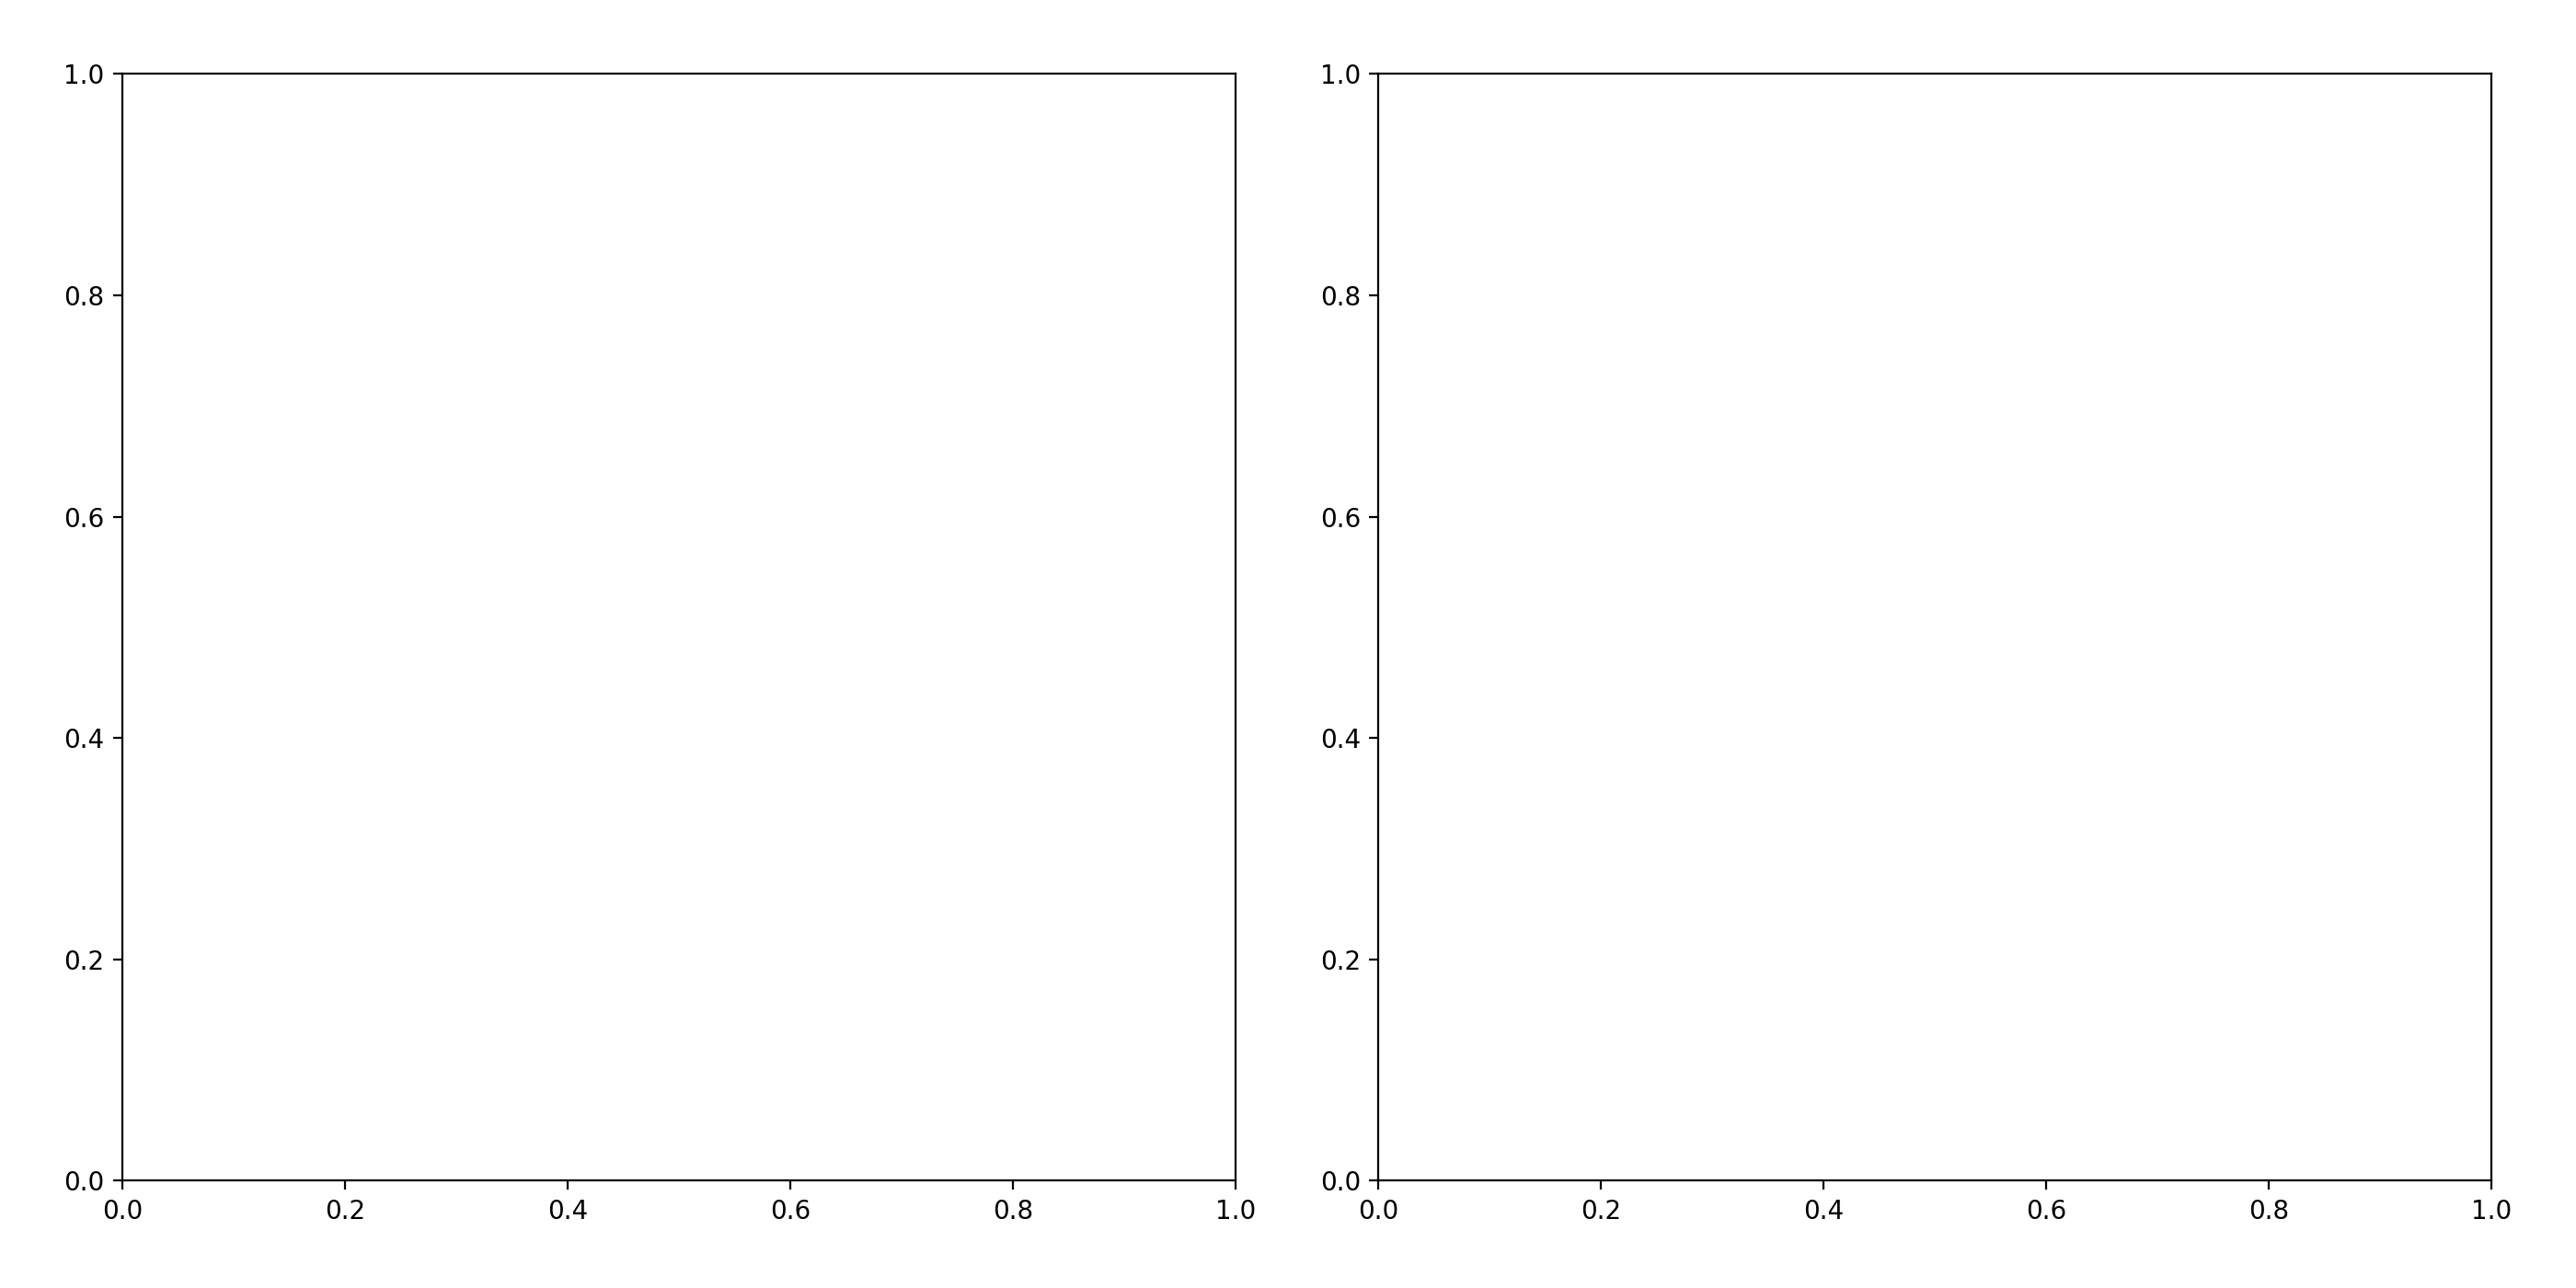

Output()

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7), dpi=200)

G = widgets.FloatSlider(value=1, min=1., max=100, step=1/51   ,layout=widgets.Layout(width='75%'), description='$1/{G_K}$ (ps), generation time')
t_f = widgets.FloatSlider(value=2, min=0., max=20, step=1/5    ,layout=widgets.Layout(width='75%'), description='t_f (ps), formation time')
t_t = widgets.FloatSlider(value=30, min=0., max=50, step=1/51 ,layout=widgets.Layout(width='75%'), description='t_t (ps), trion relaxation time')
t_r = widgets.FloatSlider(value=3, min=0., max=5, step=1/51   ,layout=widgets.Layout(width='75%'), description='t_r (ps), exciton relaxation time')
tau_l = widgets.FloatSlider(value=0.25, min=0.25, max=25, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_l (ps), exciton intervalley scattering time')
tau_t = widgets.FloatSlider(value=25, min=0.25, max=100, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_t (ps), trion intervalley scattering time')
GXTratio = widgets.FloatSlider(value=1, min=0.1, max=10, step=1/51 ,layout=widgets.Layout(width='75%'), description='GXTratio')
 
    
def need(GXTratio, t_f,t_t,t_r, tau_l, tau_t):
    ax[0].cla()
    ax[1].cla()
#     for each_tau_t in [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_t, 0.156, 0.05, 0.01]:
#         ax[1].semilogx( each_tau_t, Both_fun(each_tau_t, t_f,t_t,t_r, tau_l, GXTratio)
#                 , marker='.', linestyle='dotted', color='blueviolet' , markersize=10, linewidth=1, zorder=2, label='Both light')

#         ax[1].semilogx( each_tau_t, onlyE_fun(each_tau_t, t_f,t_t,t_r, tau_l, GXTratio) 
#                 , marker='v', linestyle='dotted', color='royalblue' , markersize=10, linewidth=2, zorder=1, label='only exciton')

#         ax[1].semilogx( each_tau_t, onlyT_fun(each_tau_t, t_f,t_t,t_r, tau_l, GXTratio)
#                 , marker='^', linestyle='dotted', color='darkseagreen' , markersize=10, linewidth=3, zorder=1, label='only trion')
    
    globals()['Both']  = []
    globals()['onlyE'] = []
    globals()['onlyT'] = []
    for each_tau_t in [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01]:
        add_Both = Both_fun(each_tau_t, t_f,t_t,t_r, tau_l, GXTratio)
        add_onlyE  =  onlyE_fun(each_tau_t, t_f,t_t,t_r, tau_l, GXTratio)  
        add_onlyT  =  onlyT_fun(each_tau_t, t_f,t_t,t_r, tau_l, GXTratio)
        globals()['Both']  += [add_Both]
        globals()['onlyE'] += [add_onlyE]
        globals()['onlyT'] += [add_onlyT]


    ax[1].semilogx( [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01], globals()['Both'],  marker='.', linestyle='dashdot', markersize=10, color='blueviolet' ,linewidth=1, zorder=2)
    ax[1].semilogx( [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01], globals()['onlyE'], marker='v', linestyle='solid', markersize=10, color='red' ,linewidth=0.75, zorder=1)
    ax[1].semilogx( [np.power(10, 5), 5000, 1000, 500, 100, 50, 25, 10, 5, 2.5, 1, 0.5, tau_l, 0.156, 0.05, 0.01], globals()['onlyT'], marker='^', linestyle='dotted', markersize=10, color='mediumseagreen' ,linewidth=3, zorder=1)
    
    
    ax[1].grid()
    ax[1].legend(['η$_{XT}$', 'η$_X$', 'η$_T$'], fontsize=12, title='cases', loc='upper right')
    ax[1].set_xlabel('$τ_{KK\'}^{t}$ (ps)', fontsize=16)
    ax[1].set_ylabel('η(%)', fontsize=16, rotation=0)
    ax[1].set_ylim(-2, 100)
    ax[1].set_title('Dop dependent on $τ_{KK\'}^{t}$', fontsize=16)
    ax[1].set_yticks(np.arange(0, 101, 1), minor=True)
    
    print('t_f =',t_f)
    print('t_t =',t_t)
    print('t_r =',t_r)
    print('tau_l =',tau_l)
    print('tau_l =',tau_t)
    
    ax[0].grid(None)
    ax[0].axis('off')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    ax[0].hlines(0.05, 0, 1, color="maroon")
    ax[0].hlines(0.8, 0.05, 0.4, color="maroon")
    ax[0].hlines(0.8, 0.6, 0.95, color="maroon")
    ax[0].hlines(0.6, 0.1, 0.4, color="darkseagreen")
    ax[0].hlines(0.6, 0.6, 0.9, color="darkseagreen")
    
    ax[0].text(0.05, 0.01, '$G_K^X / G_K^T$ ='+str(format(GXTratio,'.0f')))
    ax[0].annotate('', xy=(0.07, 0.8), xytext=(0.07, 0.05), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    ax[0].annotate('', xy=(0.12, 0.6), xytext=(0.12, 0.05), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    ax[0].text(0.16, 0.7, '$τ_f$ ='+str(format(t_f,'.0f'))+' ps')
    ax[0].text(0.86, 0.7, '$τ_f$ ='+str(format(t_f,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.15, 0.6), xytext=(0.15, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    ax[0].annotate('', xy=(0.85, 0.6), xytext=(0.85, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    
    ax[0].text(0.35, 0.45, '$τ_r$ ='+str(format(t_r,'.0f'))+' ps')
    ax[0].text(0.65, 0.45, '$τ_r$ ='+str(format(t_r,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.35, 0.05), xytext=(0.35, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    ax[0].annotate('', xy=(0.65, 0.05), xytext=(0.65, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    ax[0].text(0.15, 0.3, '$τ_t$ ='+str(format(t_t,'.0f'))+' ps')
    ax[0].text(0.85, 0.3, '$τ_t$ ='+str(format(t_t,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.15, 0.05), xytext=(0.15, 0.6), arrowprops=dict(arrowstyle='->', lw=2, color='darkseagreen'))
    ax[0].annotate('', xy=(0.85, 0.05), xytext=(0.85, 0.6), arrowprops=dict(arrowstyle='->', lw=2, color='darkseagreen'))
    
    ax[0].text(0.4, 0.82, '$τ_{KK\'}^{x}$ ='+str(format(tau_l,'.2f'))+' ps')
    ax[0].annotate('', xy=(0.4, 0.8), xytext=(0.6, 0.8), arrowprops=dict(arrowstyle='<->', lw=2, color='red'))
    
    ax[0].text(0.4, 0.62, '$τ_{KK\'}^t$ ='+str(format(tau_t,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.4, 0.6), xytext=(0.6, 0.6), arrowprops=dict(arrowstyle='<->', lw=2, color='fuchsia'))
    


plt.tight_layout(pad=2.5)
plt.show()

out = widgets.interactive_output(need, {'GXTratio':GXTratio, 't_f':t_f, 't_t':t_t, 't_r':t_r, 'tau_l':tau_l, 'tau_t':tau_t})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([GXTratio, t_f,t_t,t_r, tau_l, tau_t]) ])
display(ui , out )

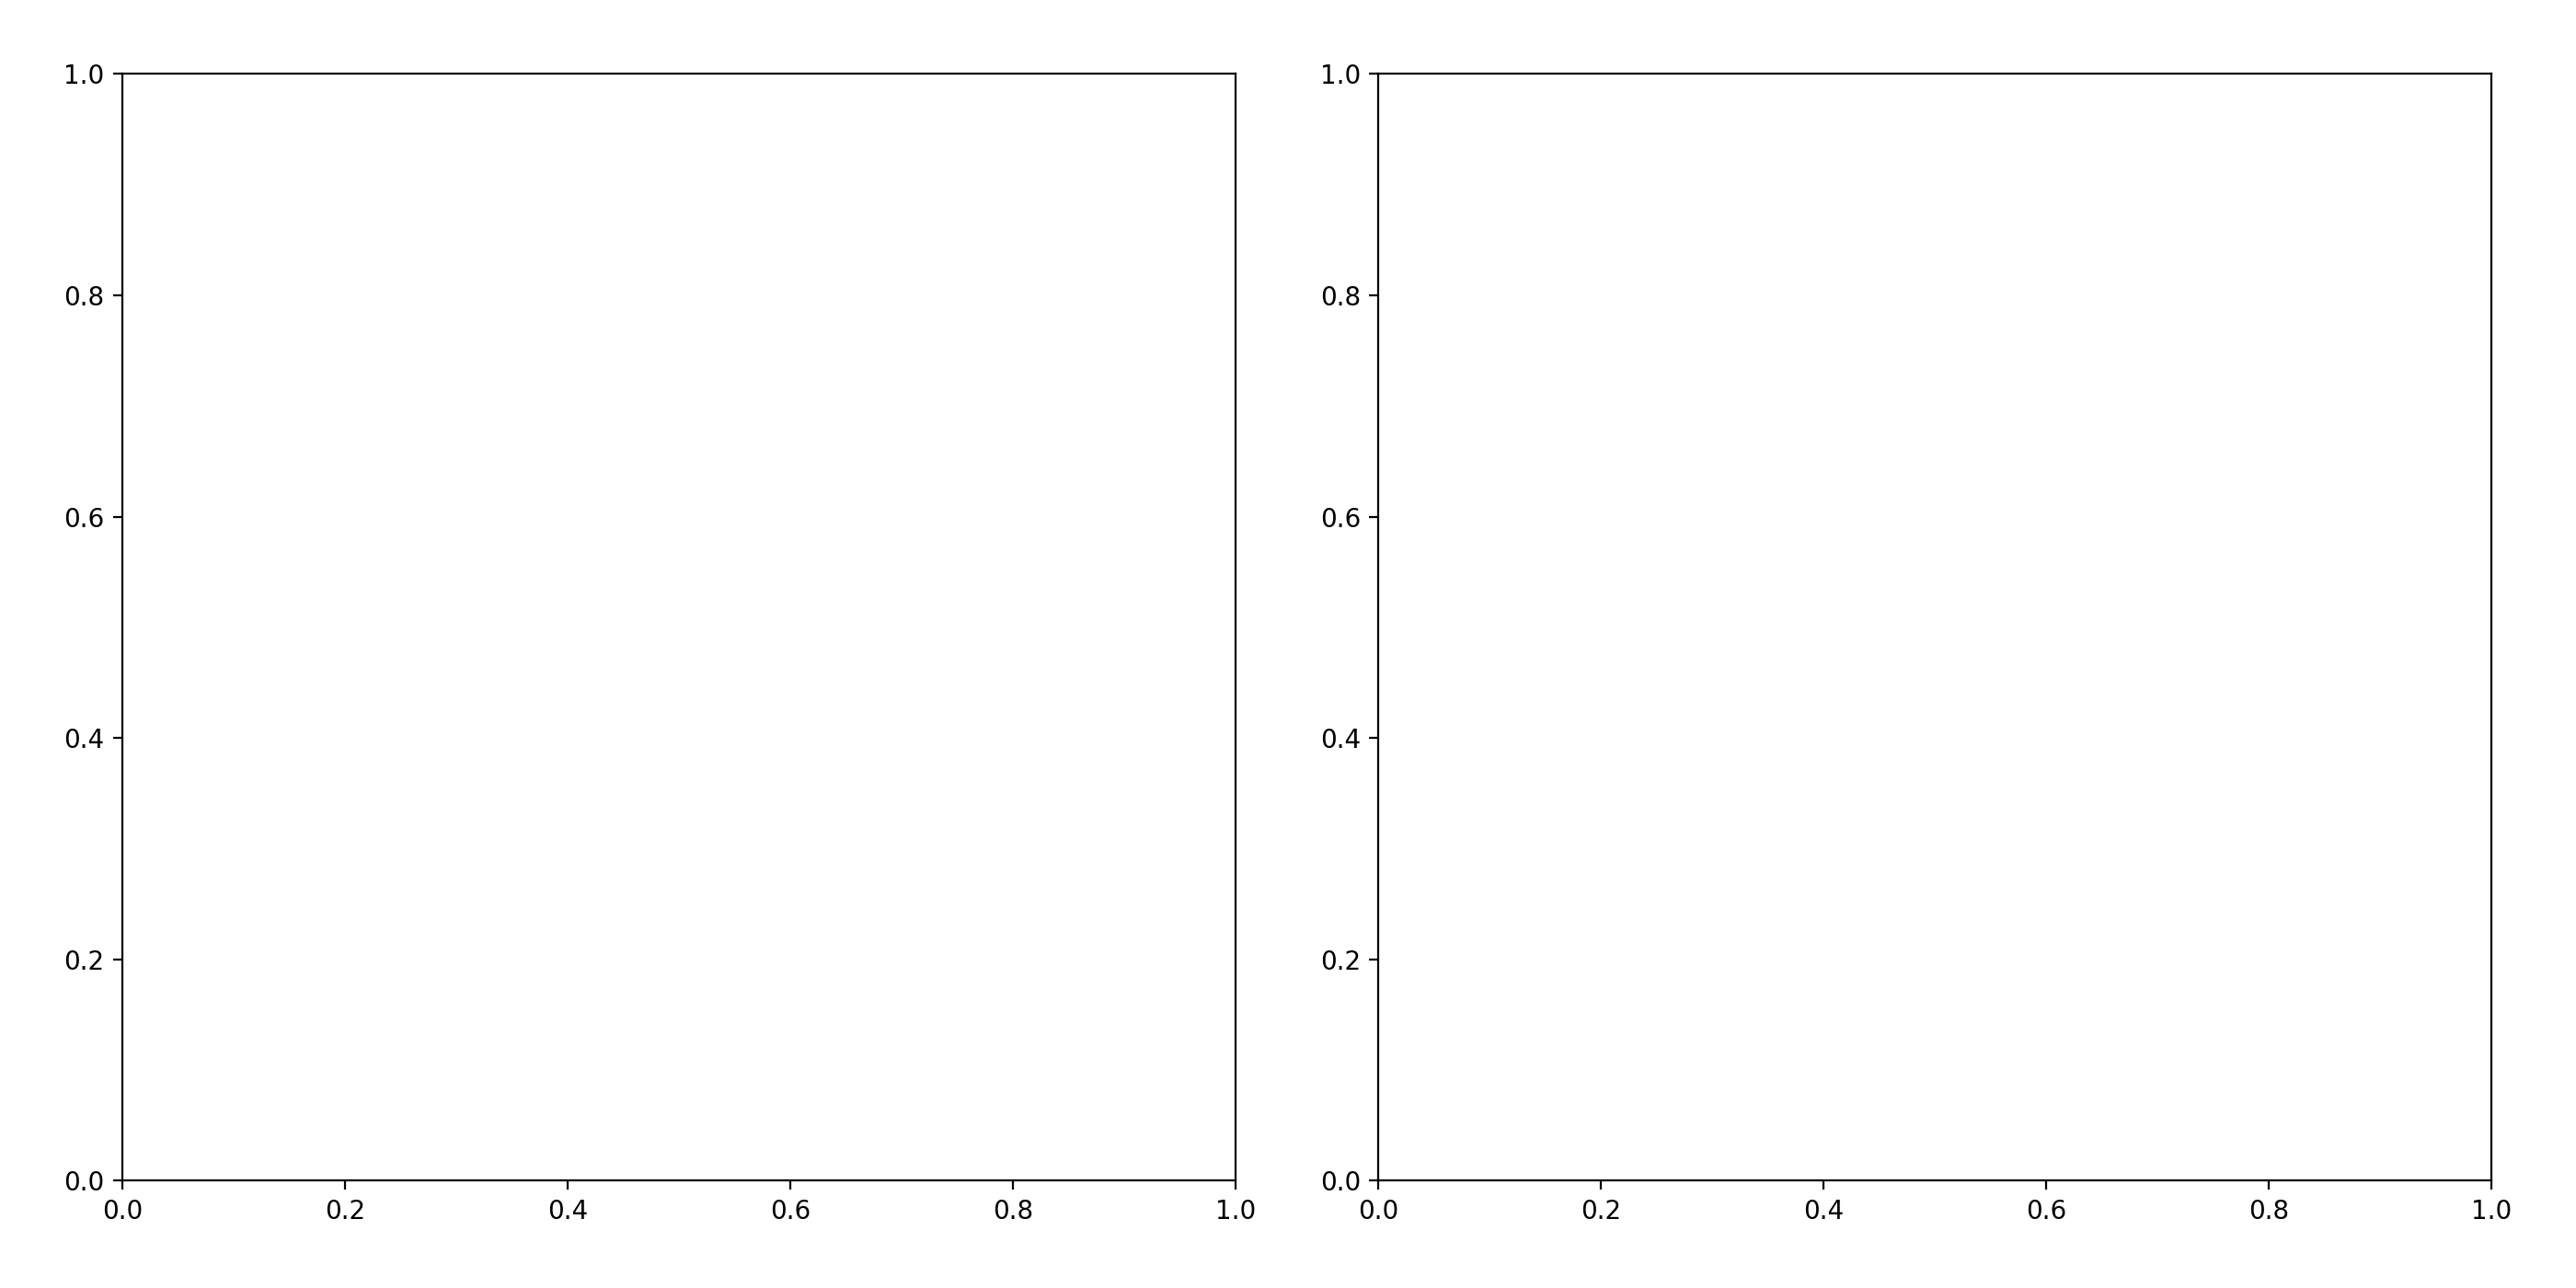

Output()

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7), dpi=200)

G = widgets.FloatSlider(value=1, min=1., max=100, step=1/51   ,layout=widgets.Layout(width='75%'), description='$1/{G_K}$ (ps), generation time')
t_f = widgets.FloatSlider(value=2, min=0., max=20, step=1/5    ,layout=widgets.Layout(width='75%'), description='t_f (ps), formation time')
t_t = widgets.FloatSlider(value=30, min=0., max=50, step=1/51 ,layout=widgets.Layout(width='75%'), description='t_t (ps), trion relaxation time')
t_r = widgets.FloatSlider(value=3, min=0., max=5, step=1/51   ,layout=widgets.Layout(width='75%'), description='t_r (ps), exciton relaxation time')
tau_x = widgets.FloatSlider(value=0.25, min=0.05, max=2, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_x (ps), exciton intervalley scattering time')
tau_t = widgets.FloatSlider(value=10000, min=0.25, max=10000, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_t (ps), trion intervalley scattering time')
GXTratio = widgets.FloatSlider(value=1, min=0.1, max=10, step=1/51 ,layout=widgets.Layout(width='75%'), description='GXTratio')
 

    
def need(GXTratio, t_f,t_t,t_r, tau_x, tau_t):
    ax[0].cla()
    ax[1].cla()
#     for each_tau_l in np.linspace(0.03, 2, 20):
#         ax[1].plot( each_tau_l, Both_fun(tau_t, t_f,t_t,t_r, each_tau_l, GXTratio)
#                 , marker='.', linestyle='dotted', color='blueviolet' , markersize=10, linewidth=1, zorder=2, label='Both light')

#         ax[1].plot( each_tau_l, onlyE_fun(tau_t, t_f,t_t,t_r, each_tau_l, GXTratio) 
#                 , marker='v', linestyle='dotted', color='royalblue' , markersize=10, linewidth=2, zorder=1, label='only exciton')

#         ax[1].plot( each_tau_l, onlyT_fun(tau_t, t_f,t_t,t_r, each_tau_l, GXTratio)
#                 , marker='^', linestyle='dotted', color='darkseagreen' , markersize=10, linewidth=3, zorder=1, label='only trion')
    
    # ax[1].text(tau_x, 95, '$τ_{KK\'}^x$ ='+str(format(tau_x,'.2f'))+' (ps)')
    # ax[1].vlines(tau_x, 0, 100, zorder=0, color='red')
    
    globals()['Both']  = []
    globals()['onlyE'] = []
    globals()['onlyT'] = []
    for each_tau_l in np.linspace(0.03, 2, 20):
        add_Both = Both_fun(tau_t, t_f,t_t,t_r, each_tau_l, GXTratio)
        add_onlyE  =  onlyE_fun(tau_t, t_f,t_t,t_r, each_tau_l, GXTratio) 
        add_onlyT  =  onlyT_fun(tau_t, t_f,t_t,t_r, each_tau_l, GXTratio)
        globals()['Both']  += [add_Both]
        globals()['onlyE'] += [add_onlyE]
        globals()['onlyT'] += [add_onlyT]


    ax[1].plot( np.linspace(0.03, 2, 20), globals()['Both'],  marker='.', linestyle='dashdot', markersize=10, color='blueviolet' ,linewidth=1, zorder=2)
    ax[1].plot( np.linspace(0.03, 2, 20), globals()['onlyE'], marker='v', linestyle='solid', markersize=10, color='red' ,linewidth=0.75, zorder=1)
    ax[1].plot( np.linspace(0.03, 2, 20), globals()['onlyT'], marker='^', linestyle='dotted', markersize=10, color='mediumseagreen' ,linewidth=3, zorder=1)
    

    ax[1].grid()
    ax[1].legend(['η$_{XT}$', 'η$_X$', 'η$_T$'], fontsize=12, title='cases', loc='upper right')
    ax[1].set_xlabel('$τ_{KK\'}^{x}$ (ps)', fontsize=16)
    ax[1].set_ylabel('η(%)', fontsize=16, rotation=0)
    ax[1].set_ylim(0, 100)
    ax[1].set_xlim(0, 2.04)
    ax[1].set_title('Dop dependent on $τ_{KK\'}^{x}$', fontsize=16)
    ax[1].set_yticks(np.arange(0, 101, 1), minor=True)
    
    print('t_f =',t_f)
    print('t_t =',t_t)
    print('t_r =',t_r)
    print('tau_x =',tau_x)
    print('tau_t =',tau_t)
    
    ax[0].grid(None)
    ax[0].axis('off')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    ax[0].hlines(0.05, 0, 1, color="maroon")
    ax[0].hlines(0.8, 0.05, 0.4, color="maroon")
    ax[0].hlines(0.8, 0.6, 0.95, color="maroon")
    ax[0].hlines(0.6, 0.1, 0.4, color="darkseagreen")
    ax[0].hlines(0.6, 0.6, 0.9, color="darkseagreen")
    
    ax[0].text(0.05, 0.01, '$G_K^X / G_K^T$ ='+str(format(GXTratio,'.0f')))
    ax[0].annotate('', xy=(0.07, 0.8), xytext=(0.07, 0.05), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    ax[0].annotate('', xy=(0.12, 0.6), xytext=(0.12, 0.05), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    ax[0].text(0.16, 0.7, '$τ_f$ ='+str(format(t_f,'.0f'))+' ps')
    ax[0].text(0.86, 0.7, '$τ_f$ ='+str(format(t_f,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.15, 0.6), xytext=(0.15, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    ax[0].annotate('', xy=(0.85, 0.6), xytext=(0.85, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    
    ax[0].text(0.35, 0.45, '$τ_r$ ='+str(format(t_r,'.0f'))+' ps')
    ax[0].text(0.65, 0.45, '$τ_r$ ='+str(format(t_r,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.35, 0.05), xytext=(0.35, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    ax[0].annotate('', xy=(0.65, 0.05), xytext=(0.65, 0.8), arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    ax[0].text(0.15, 0.3, '$τ_t$ ='+str(format(t_t,'.0f'))+' ps')
    ax[0].text(0.85, 0.3, '$τ_t$ ='+str(format(t_t,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.15, 0.05), xytext=(0.15, 0.6), arrowprops=dict(arrowstyle='->', lw=2, color='darkseagreen'))
    ax[0].annotate('', xy=(0.85, 0.05), xytext=(0.85, 0.6), arrowprops=dict(arrowstyle='->', lw=2, color='darkseagreen'))
    
    ax[0].text(0.4, 0.82, '$τ_{KK\'}^{x}$ ='+str(format(tau_x,'.2f'))+' ps')
    ax[0].annotate('', xy=(0.4, 0.8), xytext=(0.6, 0.8), arrowprops=dict(arrowstyle='<->', lw=2, color='red'))
    
    ax[0].text(0.4, 0.62, '$τ_{KK\'}^t$ ='+str(format(tau_t,'.0f'))+' ps')
    ax[0].annotate('', xy=(0.4, 0.6), xytext=(0.6, 0.6), arrowprops=dict(arrowstyle='<->', lw=2, color='fuchsia'))
    


plt.tight_layout(pad=2.5)
plt.show()

out = widgets.interactive_output(need, {'GXTratio':GXTratio, 't_f':t_f, 't_t':t_t, 't_r':t_r, 'tau_x':tau_x, 'tau_t':tau_t})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([GXTratio, t_f,t_t,t_r, tau_x, tau_t]) ])
display(ui , out )

# 拍勢啦~

In [123]:
# tau_l = 0.25 #ps  (250 fs)

t_f = 2 # ps-1
# f=0
t_t = 15 #ps
# tau_t = np.inf #ps-1
# tau_t = 1/0.00482 #ps-1
# tau_t = tau_l*1.6 #ps-1
t_r = 3 #ps  

GXTratio = 1


print('t_f =',t_f)
print('1/t_t =',1/t_t)
# print('1/tau_t =',1/tau_t)
print('1/t_r =',1/t_r)
# print('1/tau_l =',1/tau_l)

def tau(l, taux0):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) )   * (taux0/(1 / ( 4*np.pi*gamma**2*Factorial(0+1)*(2*np.pi/Factorial(0)) )))
    return Tau   

def Both_fun(tau_t, t_f,t_t,t_r, l, GXTratio, taux0):
    tau_l = tau(l, taux0)
    Both = 100* (1/t_r+1/t_f)*(1/t_t) * ( GXTratio*(1/t_t+1/t_f+2/tau_t)+(1/t_r+1/t_f+2/tau_l) ) / ( (1/t_r+1/t_f+2/tau_l)*(1/t_t+2/tau_t) * ( GXTratio*(1/t_t+1/t_f)+(1/t_r+1/t_f) ) )
    return Both

def onlyE_fun(tau_t, t_f,t_t,t_r, l, GXTratio, taux0):
    tau_l = tau(l, taux0)
    onlyE = 100* (1/t_r+1/t_f) /(1/t_r+1/t_f+2/tau_l)
    return onlyE

def onlyT_fun(tau_t, t_f,t_t,t_r, l, GXTratio, taux0):
    tau_l = tau(l, taux0)
    onlyT = 100* (1/t_r+1/t_f)*(1/t_t) * ( GXTratio*(1/t_f)+(1/t_r+1/t_f+2/tau_l) ) / ( (1/t_r+1/t_f+2/tau_l)*(1/t_t+2/tau_t) * ( GXTratio*(1/t_f)+(1/t_r+1/t_f) ) )
    return onlyT


t_f = 2
1/t_t = 0.06666666666666667
1/t_r = 0.3333333333333333


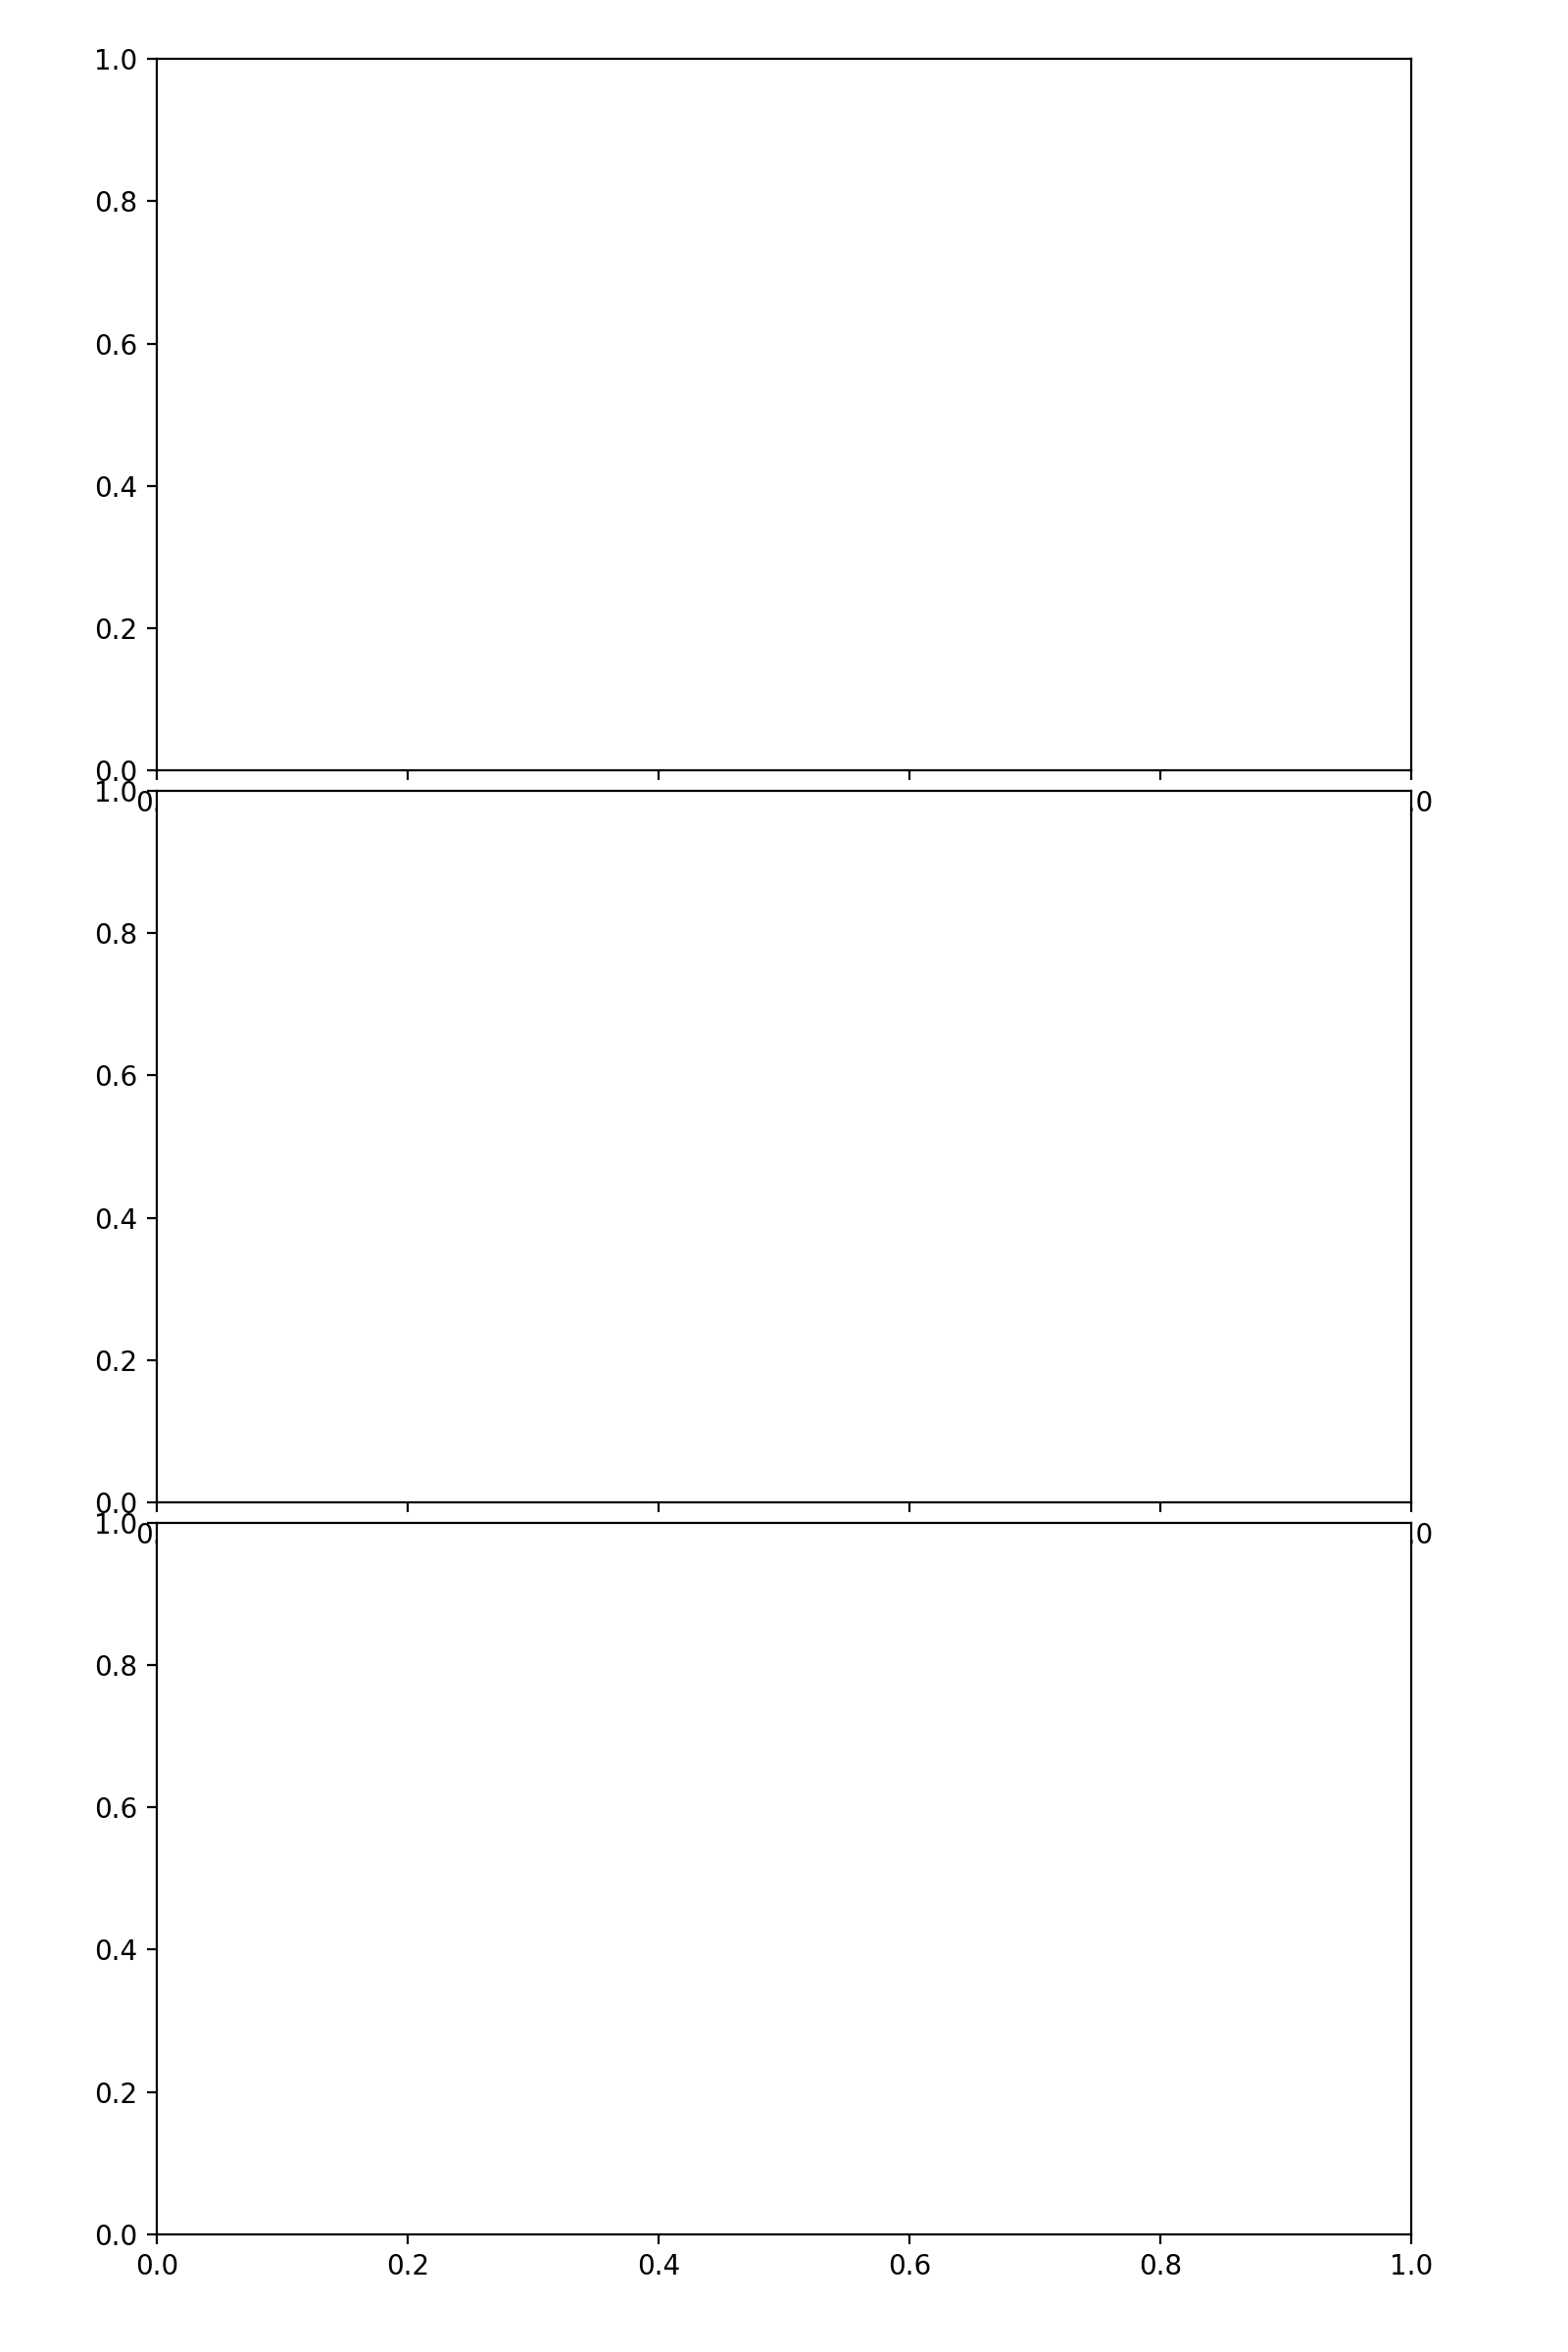

Output()

In [131]:
fig, ax = plt.subplots(3, 1,figsize=(8, 12), dpi=200)

# G = widgets.FloatSlider(value=1, min=1., max=100, step=1/51   ,layout=widgets.Layout(width='75%'), description='$1/{G_K}$ (ps), generation time')
 
t_f = widgets.FloatSlider(value=2, min=0., max=20, step=1/5    ,layout=widgets.Layout(width='75%'), description='t_f (ps), formation time')
t_t = widgets.FloatSlider(value=30, min=0., max=50, step=1/51 ,layout=widgets.Layout(width='75%'), description='t_t (ps), trion relaxation time')
t_r = widgets.FloatSlider(value=3, min=0., max=5, step=1/51   ,layout=widgets.Layout(width='75%'), description='t_r (ps), exciton relaxation time')
# tau_x = widgets.FloatSlider(value=900, min=500, max=900, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_x (ps), exciton intervalley scattering time')
tau_t = widgets.FloatSlider(value=10000, min=0.25, max=10000, step=1/51 ,layout=widgets.Layout(width='75%'), description='tau_t (ps), trion intervalley scattering time')
GXTratio = widgets.FloatSlider(value=1, min=0.1, max=10, step=1/51 ,layout=widgets.Layout(width='75%'), description='GXTratio')

    
def need(GXTratio, t_f,t_t,t_r, tau_t):
    taux0 = [0.25, 1, 2]
    for i in range(3):
        ax[i].cla()
        globals()['Both']  = []
        globals()['onlyE'] = []
        globals()['onlyT'] = []
        taux = taux0[i]
        for l in range(0,7,1):
            add_Both = Both_fun(tau_t, t_f,t_t,t_r, l, GXTratio, taux)
            add_onlyE  =  onlyE_fun(tau_t, t_f,t_t,t_r, l, GXTratio, taux)
            add_onlyT  =  onlyT_fun(tau_t, t_f,t_t,t_r, l, GXTratio, taux)
            globals()['Both']  += [add_Both]
            globals()['onlyE'] += [add_onlyE]
            globals()['onlyT'] += [add_onlyT]


        ax[i].plot( np.linspace(0, 6, 7), globals()['Both'],  marker='.', linestyle='dashdot', markersize=10, color='blueviolet' ,linewidth=1, zorder=3)
        ax[i].plot( np.linspace(0, 6, 7), globals()['onlyE'], marker='v', linestyle='solid', markersize=10, color='red' ,linewidth=0.75, zorder=2)
        ax[i].plot( np.linspace(0, 6, 7), globals()['onlyT'], marker='^', linestyle='dotted', markersize=10, color='mediumseagreen' ,linewidth=3, zorder=2)

      
        for j, v in enumerate(globals()['onlyT']):
            ax[i].text(j+0.25, v+2, "%2.1f" %v, ha="center")
        for j, v in enumerate(globals()['Both']):
            ax[i].text(j+0.25, v-6, "%2.1f" %v, ha="center")  
        for j, v in enumerate(globals()['onlyE']):
            ax[i].text(j+0.25, v+2, "%2.1f" %v, ha="center") 

        ax[i].grid()
        ax[i].set_ylabel('η(%)', fontsize=16, rotation=0)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-0.1, 6.6)
        ax[i].set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
        ax[i].set_yticks(np.arange(0, 100, 1), minor=True)
        ax[i].text(-0, 93, '$τ_{KK\'}^{\ell=0} =$'+str(format(taux0[i],'.2f'))+' ps', fontsize=16 )
        ax[0].legend(['η$_{XT}$', 'η$_X$', 'η$_T$'], fontsize=12, title='cases ', loc='upper right')
        # ax[0].set_title('Dop dependent on $\ell$', fontsize=16)
        ax[2].set_xlabel('$\ell$', fontsize=16)
        ax[2].set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])

        
# plt.tight_layout(pad=2)
plt.subplots_adjust(left=0.1, right=0.9, 
                    top=0.975, bottom=0.05, 
                    wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'GXTratio':GXTratio, 't_f':t_f, 't_t':t_t, 't_r':t_r, 'tau_t':tau_t})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([GXTratio, t_f,t_t,t_r, tau_t]) ])
display(ui , out )
